# Eagle Blend Optimizer

In [72]:
import pandas as pd
import numpy as np
import joblib
import os
import plotly.express as px
import gradio as gr

import sqlite3

In [75]:
train_df = pd.read_csv(r"C:\Users\Otto Henry\CodingWorld\Hackerthon\Fuel-Blend-Properties-Prediction\dataset\dataset\train.csv")
train_df.head()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


## Database

#### Create Sqlite3 Database and Tables

In [12]:
for i in df.columns:
    print(i)

Component1_fraction
Component2_fraction
Component3_fraction
Component4_fraction
Component5_fraction
Component1_Property1
Component2_Property1
Component3_Property1
Component4_Property1
Component5_Property1
Component1_Property2
Component2_Property2
Component3_Property2
Component4_Property2
Component5_Property2
Component1_Property3
Component2_Property3
Component3_Property3
Component4_Property3
Component5_Property3
Component1_Property4
Component2_Property4
Component3_Property4
Component4_Property4
Component5_Property4
Component1_Property5
Component2_Property5
Component3_Property5
Component4_Property5
Component5_Property5
Component1_Property6
Component2_Property6
Component3_Property6
Component4_Property6
Component5_Property6
Component1_Property7
Component2_Property7
Component3_Property7
Component4_Property7
Component5_Property7
Component1_Property8
Component2_Property8
Component3_Property8
Component4_Property8
Component5_Property8
Component1_Property9
Component2_Property9
Component3_Propert

In [13]:
columns_list = df.columns.tolist()
columns_list

['Component1_fraction',
 'Component2_fraction',
 'Component3_fraction',
 'Component4_fraction',
 'Component5_fraction',
 'Component1_Property1',
 'Component2_Property1',
 'Component3_Property1',
 'Component4_Property1',
 'Component5_Property1',
 'Component1_Property2',
 'Component2_Property2',
 'Component3_Property2',
 'Component4_Property2',
 'Component5_Property2',
 'Component1_Property3',
 'Component2_Property3',
 'Component3_Property3',
 'Component4_Property3',
 'Component5_Property3',
 'Component1_Property4',
 'Component2_Property4',
 'Component3_Property4',
 'Component4_Property4',
 'Component5_Property4',
 'Component1_Property5',
 'Component2_Property5',
 'Component3_Property5',
 'Component4_Property5',
 'Component5_Property5',
 'Component1_Property6',
 'Component2_Property6',
 'Component3_Property6',
 'Component4_Property6',
 'Component5_Property6',
 'Component1_Property7',
 'Component2_Property7',
 'Component3_Property7',
 'Component4_Property7',
 'Component5_Property7',
 'Com

In [3]:
import pandas as pd
import numpy as np


# 1️⃣ Create 5 new component cost columns with NaN
new_component_cols = [f"Component{i}_unit_cost" for i in range(1, 6)]
for col in new_component_cols:
    df[col] = np.nan

# Reorder so that these columns come before "BlendProperty1"
blend1_index = df.columns.get_loc("BlendProperty1")
cols = list(df.columns)

# Move the new columns to the correct spot
for col in new_component_cols[::-1]:  # reverse to insert in correct order
    cols.insert(blend1_index, cols.pop(cols.index(col)))

df = df[cols]

# 2️⃣ Add Target_Cost column after "BlendProperty10"
df["Target_Cost"] = np.nan
blend10_index = df.columns.get_loc("BlendProperty10")
cols = list(df.columns)
cols.insert(blend10_index + 1, cols.pop(cols.index("Target_Cost")))

df = df[cols]

print(df)


      Component1_fraction  Component2_fraction  Component3_fraction  \
0                    0.21                 0.00                 0.42   
1                    0.02                 0.33                 0.19   
2                    0.08                 0.08                 0.18   
3                    0.25                 0.42                 0.00   
4                    0.26                 0.16                 0.08   
...                   ...                  ...                  ...   
1995                 0.50                 0.12                 0.00   
1996                 0.19                 0.31                 0.00   
1997                 0.38                 0.06                 0.14   
1998                 0.50                 0.16                 0.00   
1999                 0.00                 0.34                 0.21   

      Component4_fraction  Component5_fraction  Component1_Property1  \
0                    0.25                 0.12             -0.021782   
1  

In [15]:
for i in df.columns:
    print(i)

Component1_fraction
Component2_fraction
Component3_fraction
Component4_fraction
Component5_fraction
Component1_Property1
Component2_Property1
Component3_Property1
Component4_Property1
Component5_Property1
Component1_Property2
Component2_Property2
Component3_Property2
Component4_Property2
Component5_Property2
Component1_Property3
Component2_Property3
Component3_Property3
Component4_Property3
Component5_Property3
Component1_Property4
Component2_Property4
Component3_Property4
Component4_Property4
Component5_Property4
Component1_Property5
Component2_Property5
Component3_Property5
Component4_Property5
Component5_Property5
Component1_Property6
Component2_Property6
Component3_Property6
Component4_Property6
Component5_Property6
Component1_Property7
Component2_Property7
Component3_Property7
Component4_Property7
Component5_Property7
Component1_Property8
Component2_Property8
Component3_Property8
Component4_Property8
Component5_Property8
Component1_Property9
Component2_Property9
Component3_Propert

In [4]:
import sqlite3

# Create or connect to the SQLite database
conn = sqlite3.connect("eagleblend.db")  # This file will be saved in your current working directory
cursor = conn.cursor()

# Create blends table (example: only a few columns shown for demo)
cursor.execute("""
CREATE TABLE IF NOT EXISTS blends (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    blend_name TEXT,
    Component1_fraction REAL,
    Component2_fraction REAL,
    Component3_fraction REAL,
    Component4_fraction REAL,
    Component5_fraction REAL,
    Component1_Property1 REAL,
    Component2_Property1 REAL,
    Component3_Property1 REAL,
    Component4_Property1 REAL,
    Component5_Property1 REAL,
    Component1_Property2 REAL,
    Component2_Property2 REAL,
    Component3_Property2 REAL,
    Component4_Property2 REAL,
    Component5_Property2 REAL,
    Component1_Property3 REAL,
    Component2_Property3 REAL,
    Component3_Property3 REAL,
    Component4_Property3 REAL,
    Component5_Property3 REAL,
    Component1_Property4 REAL,
    Component2_Property4 REAL,
    Component3_Property4 REAL,
    Component4_Property4 REAL,
    Component5_Property4 REAL,
    Component1_Property5 REAL,
    Component2_Property5 REAL,
    Component3_Property5 REAL,
    Component4_Property5 REAL,
    Component5_Property5 REAL,
    Component1_Property6 REAL,
    Component2_Property6 REAL,
    Component3_Property6 REAL,
    Component4_Property6 REAL,
    Component5_Property6 REAL,
    Component1_Property7 REAL,
    Component2_Property7 REAL,
    Component3_Property7 REAL,
    Component4_Property7 REAL,
    Component5_Property7 REAL,
    Component1_Property8 REAL,
    Component2_Property8 REAL,
    Component3_Property8 REAL,
    Component4_Property8 REAL,
    Component5_Property8 REAL,
    Component1_Property9 REAL,
    Component2_Property9 REAL,
    Component3_Property9 REAL,
    Component4_Property9 REAL,
    Component5_Property9 REAL,
    Component1_Property10 REAL,
    Component2_Property10 REAL,
    Component3_Property10 REAL,
    Component4_Property10 REAL,
    Component5_Property10 REAL,
    Component1_unit_cost REAL,
    Component2_unit_cost REAL,
    Component3_unit_cost REAL,
    Component4_unit_cost REAL,
    Component5_unit_cost REAL,
    BlendProperty1 REAL,
    BlendProperty2 REAL,
    BlendProperty3 REAL,
    BlendProperty4 REAL,
    BlendProperty5 REAL,
    BlendProperty6 REAL,
    BlendProperty7 REAL,
    BlendProperty8 REAL,
    BlendProperty9 REAL,
    BlendProperty10 REAL,
    Target_Cost REAL
);
""")

# Commit changes
conn.commit()

In [ ]:
# Connect to your database
conn = sqlite3.connect("eagleblend.db")

df[1:].to_sql("blends", conn, if_exists="append", index=False)

# Close connection
conn.close()

#### View the Blends Table

In [74]:
import sqlite3
import pandas as pd

# Connect to your database
conn = sqlite3.connect("eagleblend.db")

# Read the blends table into a pandas DataFrame
df_blends = pd.read_sql_query("SELECT * FROM blends", conn)

# Display the first few rows
# print(df_blends.head())

# Close connection
conn.close()

print(df_blends.shape)
df_blends.head(5)

(2513, 78)


,id,blend_name,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,...,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10,Target_Cost,activity,PreOpt_Cost,Optimized_Cost,created_at,Quality_Score
0,1,train1,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,...,0.305850,0.193460,0.580374,-0.762738,None,None,NaN,NaN,2025-08-14 07:21:52,NaN
1,2,train2,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,...,-0.439171,-1.379041,-1.280989,-0.503625,None,None,NaN,NaN,2025-08-14 07:21:52,NaN
2,3,train3,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,...,0.601289,0.872950,0.660000,2.024576,None,None,NaN,NaN,2025-08-14 07:21:52,NaN
3,4,train4,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,...,-1.840566,0.300293,-0.351336,-1.551914,None,None,NaN,NaN,2025-08-14 07:21:52,NaN
4,5,train5,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,...,0.286344,-0.265192,0.430513,0.735073,None,None,NaN,NaN,2025-08-14 07:21:52,NaN


In [43]:
df_blends[:1].to_csv("blends_template_1.csv", index=False)

### Ensure Timestamp Column is added

In [23]:
import sqlite3
from pprint import pprint

DB_PATH = "eagleblend.db"   # <- make sure this matches your actual DB file
TABLE  = "blends"
NEW_COL = "created_at"

def column_exists(cursor, table, column):
    cursor.execute(f"PRAGMA table_info({table})")
    cols = [row[1] for row in cursor.fetchall()]  # row[1] is column name
    return column in cols

def table_exists(cursor, table):
    cursor.execute(
        "SELECT name FROM sqlite_master WHERE type='table' AND name=?",
        (table,)
    )
    return cursor.fetchone() is not None

def ensure_created_at(db_path=DB_PATH, table=TABLE, col=NEW_COL):
    # Add a small timeout so we wait if the DB is momentarily locked
    conn = sqlite3.connect(db_path, timeout=10)
    cur = conn.cursor()
    try:
        # 1) sanity checks
        if not table_exists(cur, table):
            raise RuntimeError(f"Table '{table}' does not exist in {db_path}")

        # 2) add column only if missing
        if column_exists(cur, table, col):
            print(f"ℹ️ Column '{col}' already exists on '{table}'.")
        else:
            cur.execute(f"ALTER TABLE {table} ADD COLUMN {col} TIMESTAMP")
            cur.execute(f"UPDATE {table} SET {col} = CURRENT_TIMESTAMP WHERE {col} IS NULL")

            print(f"✅ Added column '{col}' to '{table}' with DEFAULT CURRENT_TIMESTAMP.")

        conn.commit()

        # 3) verify columns
        cur.execute(f"PRAGMA table_info({table})")
        info = cur.fetchall()
        print("\nColumns now on table:", table)
        pprint([(c[1], c[2], c[4]) for c in info])  # (name, type, default)

    finally:
        conn.close()

ensure_created_at()


✅ Added column 'created_at' to 'blends' with DEFAULT CURRENT_TIMESTAMP.

Columns now on table: blends
[('id', 'INTEGER', None),
 ('blend_name', 'TEXT', None),
 ('Component1_fraction', 'REAL', None),
 ('Component2_fraction', 'REAL', None),
 ('Component3_fraction', 'REAL', None),
 ('Component4_fraction', 'REAL', None),
 ('Component5_fraction', 'REAL', None),
 ('Component1_Property1', 'REAL', None),
 ('Component2_Property1', 'REAL', None),
 ('Component3_Property1', 'REAL', None),
 ('Component4_Property1', 'REAL', None),
 ('Component5_Property1', 'REAL', None),
 ('Component1_Property2', 'REAL', None),
 ('Component2_Property2', 'REAL', None),
 ('Component3_Property2', 'REAL', None),
 ('Component4_Property2', 'REAL', None),
 ('Component5_Property2', 'REAL', None),
 ('Component1_Property3', 'REAL', None),
 ('Component2_Property3', 'REAL', None),
 ('Component3_Property3', 'REAL', None),
 ('Component4_Property3', 'REAL', None),
 ('Component5_Property3', 'REAL', None),
 ('Component1_Property4', 

In [10]:
conn = sqlite3.connect("eagleblend.db")
cursor = conn.cursor()

# Get all row IDs in the order they were inserted
cursor.execute("SELECT id FROM blends ORDER BY id")
rows = cursor.fetchall()

# Assign blend names sequentially
for idx, (row_id,) in enumerate(rows, start=1):
    blend_name = f"train{idx}"
    cursor.execute("UPDATE blends SET blend_name = ? WHERE id = ?", (blend_name, row_id))

conn.commit()
conn.close()
print("Existing blends updated with sequential names.")


Existing blends updated with sequential names.


### Add Blends Function

In [ ]:
# import sqlite3
# import pandas as pd
# import re

# def add_blends(df, db_path="eagleblend.db"):
#     """
#     Adds blends to the database.
#     - If 'blend_name' is empty, assigns 'blendX' where X is the next available number.
#     - Works on the entire DataFrame at once.
#     """
    
#     conn = sqlite3.connect(db_path)
#     cur = conn.cursor()
    
#     # Get current max blend number from DB
#     cur.execute("SELECT blend_name FROM blends WHERE blend_name LIKE 'blend%'")
#     existing_blends = cur.fetchall()
    
#     numbers = []
#     for b in existing_blends:
#         match = re.match(r"blend(\d+)$", b[0])
#         if match:
#             numbers.append(int(match.group(1)))
    
#     start_num = max(numbers) if numbers else 0
    
#     # Fill missing blend_name in the DataFrame
#     missing_mask = df['blend_name'].isna() | (df['blend_name'] == "")
#     df.loc[missing_mask, 'blend_name'] = [
#         f"blend{i}" for i in range(start_num+1, start_num+1+missing_mask.sum())
#     ]
    
#     # Insert all rows at once
#     df.to_sql('blends', conn, if_exists='append', index=False)
    
#     conn.commit()
#     conn.close()


In [37]:
import sqlite3
import pandas as pd
import re

def add_blends(df, db_path="eagleblend.db"):
    """
    Adds blends to the database safely:
    - Automatically assigns 'blendX' for missing blend_name.
    - Only inserts columns that exist in the DB table.
    - Avoids errors from extra DB columns.
    """
    
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    
    # Get current blend numbers from DB
    cur.execute("SELECT blend_name FROM blends WHERE blend_name LIKE 'blend%'")
    existing_blends = cur.fetchall()
    
    numbers = []
    for b in existing_blends:
        match = re.match(r"blend(\d+)$", b[0])
        if match:
            numbers.append(int(match.group(1)))
    
    start_num = max(numbers) if numbers else 0
    
    # Fill missing blend_name
    missing_mask = df['blend_name'].isna() | (df['blend_name'] == "")
    df.loc[missing_mask, 'blend_name'] = [
        f"blend{i}" for i in range(start_num+1, start_num+1+missing_mask.sum())
    ]
    
    # Get DB table columns
    cur.execute("PRAGMA table_info(blends)")
    db_columns = [row[1] for row in cur.fetchall()]  # row[1] is column name
    
    # Keep only columns that exist in DB
    safe_df = df[[col for col in df.columns if col in db_columns]]
    
    # Insert
    safe_df.to_sql('blends', conn, if_exists='append', index=False)
    
    conn.commit()
    conn.close()


In [62]:
df_blends.head()

,id,blend_name,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,...,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10,Target_Cost
0,1,blend1,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,...,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738,None
1,2,blend2,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,...,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625,None
2,3,blend3,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,...,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576,None
3,4,blend4,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,...,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914,None
4,5,blend5,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,...,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073,None


In [8]:
# Remove 'id' if it exists
if 'id' in df_blends.columns:
    df_blends = df_blends.drop(columns=['id'])

df_new = df_blends.iloc[[3, 4, 5, 7]]
# df_new.loc[1, 'blend_name'] = ""
df_new.blend_name = ""
df_new['activity'] =['entry', 'prediction', 'optimization', 'prediction']
df_new['PreOpt_Cost'] = [0.8, 0.5, 0.6, 0.7]
df_new['Optimized_Cost'] = [0.2, 0.1, 0.4, 0.3]

# df_new.loc[1, 'blend_name'] = ""
# df.columns.get_loc('blend_name')
add_blends(df_new)

C:\Users\JOY OTTO\AppData\Local\Temp\ipykernel_7352\2751940101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.blend_name = ""
C:\Users\JOY OTTO\AppData\Local\Temp\ipykernel_7352\2751940101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['activity'] =['entry', 'prediction', 'optimization', 'prediction']
C:\Users\JOY OTTO\AppData\Local\Temp\ipykernel_7352\2751940101.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [ ]:
# Insert DataFrames into respective tables
# components_df.to_sql("components", conn, if_exists="append", index=False)
# activity_df.to_sql("activity_log", conn, if_exists="append", index=False)

# Commit & close
conn.commit()
conn.close()

In [12]:
# Create or connect to the SQLite database
conn = sqlite3.connect("eagleblend.db")  # This file will be saved in your current working directory
cursor = conn.cursor()

# Create components table (example with fewer columns shown)
cursor.execute("""
CREATE TABLE IF NOT EXISTS components (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    component_name TEXT,
    blend_name TEXT,
    component_fraction REAL,
    property1 REAL,
    property2 REAL,
    property3 REAL,
    property4 REAL,
    property5 REAL,
    property6 REAL,
    property7 REAL,
    property8 REAL,
    property9 REAL,
    property10 REAL,
    unit_cost REAL
    
);
""")
conn.commit()

In [84]:
import pandas as pd
import numpy as np
from typing import Optional

def explode_blends_to_components(blends_df: pd.DataFrame,
                                 n_components: int = 5,
                                 keep_empty: bool = False,
                                 blend_name_col: str = "blend_name") -> pd.DataFrame:
    """
    Convert a blends DataFrame into a components DataFrame.

    Parameters
    ----------
    blends_df : pd.DataFrame
        DataFrame with columns following the pattern:
        Component1_fraction, Component1_Property1..Property10, Component1_unit_cost, ...
    n_components : int
        Number of components per blend (default 5).
    blend_name_col : str
        Column name in blends_df that stores the blend name.

    Returns
    -------
    pd.DataFrame
        components_df with columns:
        ['blend_name', 'component_name', 'component_fraction',
         'property1', ..., 'property10', 'unit_cost']
    """

    components_rows = []
    prop_names = [f"property{i}" for i in range(1, 11)]

    for _, blend_row in blends_df.iterrows():
        blend_name = blend_row.get(blend_name_col)
        # Fallback if blend_name is missing/empty - keep index-based fallback
        if not blend_name or str(blend_name).strip() == "":
            # use the dataframe index + 1 to create a fallback name
            blend_name = f"blend{int(blend_row.name) + 1}"

        for i in range(1, n_components + 1):
            # Build column keys
            frac_col = f"Component{i}_fraction"
            unit_cost_col = f"Component{i}_unit_cost"
            prop_cols = [f"Component{i}_Property{j}" for j in range(1, 11)]

            # Safely get values (if column missing, get NaN)
            comp_frac = blend_row.get(frac_col, np.nan)
            comp_unit_cost = blend_row.get(unit_cost_col, np.nan)
            comp_props = [blend_row.get(pc, np.nan) for pc in prop_cols]

            row = {
                "blend_name": blend_name,
                "component_name": f"{blend_name}_Component_{i}",
                "component_fraction": comp_frac,
                "unit_cost": comp_unit_cost,
                "component_type": i
            }
            # add property1..property10
            for j, v in enumerate(comp_props, start=1):
                row[f"property{j}"] = v

            components_rows.append(row)

    components_df = pd.DataFrame(components_rows)

    # if not keep_empty:
    #     # Drop rows where component_fraction is NaN or equals 0 (considered "empty")
    #     components_df = components_df.loc[
    #         ~(components_df["component_fraction"].isna() | (components_df["component_fraction"] == 0))
    #     ].reset_index(drop=True)
    # else:
    #     components_df = components_df.reset_index(drop=True)

    return components_df

components_df = explode_blends_to_components(df_blends, n_components=5, keep_empty=False)
print(components_df.shape)
components_df.head(10)

(12565, 15)


,blend_name,component_name,component_fraction,unit_cost,component_type,property1,property2,property3,property4,property5,property6,property7,property8,property9,property10
0,train1,train1_Component_1,0.21,NaN,1,-0.021782,-1.229799,-0.393322,-1.763085,0.051779,-1.483333,-0.509380,0.293815,0.480368,-1.244963
1,train1,train1_Component_2,0.00,NaN,2,1.981251,-0.580274,0.221189,0.984515,1.005824,-1.748359,-0.468733,-0.115753,1.044967,-1.355050
2,train1,train1_Component_3,0.42,NaN,3,0.020036,0.133998,0.656104,-1.548115,-0.430868,1.503443,-1.317675,-0.917992,-0.450956,-0.314423
3,train1,train1_Component_4,0.25,NaN,4,0.140315,0.817835,0.074461,-1.654290,1.743608,0.023043,0.132155,-0.274704,0.674572,0.993593
4,train1,train1_Component_5,0.12,NaN,5,1.032029,0.216116,-3.082938,-1.410049,0.296713,1.741303,0.221237,0.513326,-0.636394,-2.728928
5,train2,train2_Component_1,0.02,NaN,1,-0.224339,-1.075041,-0.691084,-1.869709,-0.375340,-0.222145,-1.204671,0.948338,-1.958826,-1.160435
6,train2,train2_Component_2,0.33,NaN,2,1.148036,0.892835,-0.255620,0.896234,1.081967,0.344109,0.795790,0.812621,-0.019603,-0.014276
7,train2,train2_Component_3,0.19,NaN,3,-1.107840,1.363473,1.270776,-1.541202,-0.017281,0.703365,0.248477,-0.574724,-0.807923,-0.135968
8,train2,train2_Component_4,0.46,NaN,4,0.149533,-1.743684,-0.333798,-0.244737,-1.913700,-0.737121,0.366540,-0.837602,0.148715,-1.221155
9,train2,train2_Component_5,0.00,NaN,5,-0.354000,1.273144,-2.086526,-0.175381,-0.436747,0.988643,0.125072,0.636329,1.439313,0.896222


In [101]:
blends_example

,blend_name,Component1_fraction,Component1_Property1,Component1_Property2,Component1_unit_cost,Component2_fraction,Component2_Property1,Component2_Property2,Component2_unit_cost,Component3_fraction,Component3_Property1,Component3_unit_cost,Component4_fraction,Component4_Property1,Component4_unit_cost,Component5_fraction,Component5_Property1,Component5_unit_cost
0,blend1,0.4,1,10.0,5.0,0.3,2,20.0,6.0,0.2,3.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
1,MyBlend,0.5,11,NaN,4.5,0.5,12,NaN,5.5,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


In [11]:
conn.close()

#### Push the Components table to the database

In [14]:
# Connect to your database
conn = sqlite3.connect("eagleblend.db")

components_df.to_sql("components", conn, if_exists="append", index=False)

# Close connection
conn.close()

#### View the Components table

In [49]:
# Connect to your database
conn = sqlite3.connect("eagleblend.db")

# Read the blends table into a pandas DataFrame
df_components = pd.read_sql_query("SELECT * FROM components", conn)

# Display the first few rows
# print(df_blends.head())

# Close connection
conn.close()

print(df_components.shape)
df_components.head(10)

(10000, 15)


,id,component_name,blend_name,component_fraction,property1,property2,property3,property4,property5,property6,property7,property8,property9,property10,unit_cost
0,1,blend1_Component_1,blend1,0.21,-0.021782,-1.229799,-0.393322,-1.763085,0.051779,-1.483333,-0.509380,0.293815,0.480368,-1.244963,None
1,2,blend1_Component_2,blend1,0.00,1.981251,-0.580274,0.221189,0.984515,1.005824,-1.748359,-0.468733,-0.115753,1.044967,-1.355050,None
2,3,blend1_Component_3,blend1,0.42,0.020036,0.133998,0.656104,-1.548115,-0.430868,1.503443,-1.317675,-0.917992,-0.450956,-0.314423,None
3,4,blend1_Component_4,blend1,0.25,0.140315,0.817835,0.074461,-1.654290,1.743608,0.023043,0.132155,-0.274704,0.674572,0.993593,None
4,5,blend1_Component_5,blend1,0.12,1.032029,0.216116,-3.082938,-1.410049,0.296713,1.741303,0.221237,0.513326,-0.636394,-2.728928,None
5,6,blend2_Component_1,blend2,0.02,-0.224339,-1.075041,-0.691084,-1.869709,-0.375340,-0.222145,-1.204671,0.948338,-1.958826,-1.160435,None
6,7,blend2_Component_2,blend2,0.33,1.148036,0.892835,-0.255620,0.896234,1.081967,0.344109,0.795790,0.812621,-0.019603,-0.014276,None
7,8,blend2_Component_3,blend2,0.19,-1.107840,1.363473,1.270776,-1.541202,-0.017281,0.703365,0.248477,-0.574724,-0.807923,-0.135968,None
8,9,blend2_Component_4,blend2,0.46,0.149533,-1.743684,-0.333798,-0.244737,-1.913700,-0.737121,0.366540,-0.837602,0.148715,-1.221155,None
9,10,blend2_Component_5,blend2,0.00,-0.354000,1.273144,-2.086526,-0.175381,-0.436747,0.988643,0.125072,0.636329,1.439313,0.896222,None


In [52]:
df_components[50:51].to_csv("components_template_1.csv", index=False)

#### Create Activity Log table

In [5]:
import sqlite3

# Path to your SQLite database
db_path = "eagleblend.db"  # Change if it's in a different location

# Connect to the database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Add a new column 'activity' with default NULL (None in Python)
cursor.execute("""
    ALTER TABLE blends
    ADD COLUMN PreOpt_Cost REAL
""")
cursor.execute("""
    ALTER TABLE blends
    ADD COLUMN Optimized_Cost REAL
""")

# Commit the changes and close the connection
conn.commit()
conn.close()

print("Column 'Cost Columns' added successfully.")
# Activity - 'optimization', 'prediction', 'entry'


Column 'Cost Columns' added successfully.


#### Create Model Registry table

In [17]:

# Create or connect to the SQLite database
conn = sqlite3.connect("eagleblend.db")  # This file will be saved in your current working directory
cursor = conn.cursor()

# Create components table (example with fewer columns shown)
cursor.execute("""
CREATE TABLE IF NOT EXISTS models_registry (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    model_name TEXT,
    R2_Score REAL,
    MSE REAL,
    MAPE REAL
);
""")
# Delete the table
# cursor.execute(f"DROP TABLE IF EXISTS models_registry")
conn.commit()
conn.close()


#### Insert Data into the Model Registry table

In [18]:
import sqlite3
from datetime import datetime

# --- Configuration ---
version_number = 1  # You can increment this for each new model
R2 = 0.89
MSE = 0.012
MAPE = 4.5

# --- Generate model name ---
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_name = f"v{version_number}_{timestamp}"

# --- Connect to database ---
conn = sqlite3.connect("eagleblend.db")
cursor = conn.cursor()

# --- Create table if it doesn't exist ---
cursor.execute("""
CREATE TABLE IF NOT EXISTS models_registry (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    model_name TEXT,
    R2_Score REAL,
    MSE REAL,
    MAPE REAL
);
""")

# --- Insert into table ---
cursor.execute("""
INSERT INTO models_registry (model_name, R2_Score, MSE, MAPE)
VALUES (?, ?, ?, ?)
""", (model_name, R2, MSE, MAPE))

conn.commit()
conn.close()

print(f"Model '{model_name}' saved successfully!")


Model 'v1_2025-08-14_07-54-30' saved successfully!


In [65]:
import sqlite3

# Path to your SQLite database
db_path = "eagleblend.db"  # Change if it's in a different location

# Connect to the database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Add a new column with default NULL (None in Python)
cursor.execute("""
    ALTER TABLE blends
    ADD COLUMN Quality_Score REAL
""")
# Commit the changes and close the connection
conn.commit()
conn.close()

### Add some columns to the Model Registry table

In [ ]:
# import sqlite3

# # Path to your SQLite database
# db_path = "eagleblend.db"  # Change if it's in a different location

# # Connect to the database
# conn = sqlite3.connect(db_path)
# cursor = conn.cursor()

# # Add a new column 'activity' with default NULL (None in Python)
# cursor.execute("""
#     ALTER TABLE models_registry
#     ADD COLUMN BlendProperty6_Score REAL
# """)
# cursor.execute("""
#     ALTER TABLE models_registry
#     ADD COLUMN BlendProperty7_Score REAL
# """)
# cursor.execute("""
#     ALTER TABLE models_registry
#     ADD COLUMN BlendProperty8_Score REAL
# """)
# cursor.execute("""
#     ALTER TABLE models_registry
#     ADD COLUMN BlendProperty9_Score REAL
# """)
# cursor.execute("""
#     ALTER TABLE models_registry
#     ADD COLUMN BlendProperty10_Score REAL
# """)

# # Commit the changes and close the connection
# conn.commit()
# conn.close()

# print("Column 'Cost Columns' added successfully.")
# # Activity - 'optimization', 'prediction', 'entry'


Column 'Cost Columns' added successfully.


### View Model Registry Table

In [9]:
# Connect to your database
conn = sqlite3.connect("eagleblend.db")

# Read the blends table into a pandas DataFrame
df_models = pd.read_sql_query("SELECT * FROM models_registry", conn)

# Display the first few rows
# print(df_blends.head())

# Close connection
conn.close()

print(df_models.shape)
df_models.head(10)

(2, 15)


,id,model_name,R2_Score,MSE,MAPE,BlendProperty1_Score,BlendProperty2_Score,BlendProperty3_Score,BlendProperty4_Score,BlendProperty5_Score,BlendProperty6_Score,BlendProperty7_Score,BlendProperty8_Score,BlendProperty9_Score,BlendProperty10_Score
0,1,v1_2025-08-14_07-54-30,0.89,0.012,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,v2_2025-08-15_08-00-00,0.92,0.010,4.2,0.99,0.97,0.88,0.98,0.92,0.95,0.85,0.89,0.9,0.96


In [10]:
df_models.columns

Index(['id', 'model_name', 'R2_Score', 'MSE', 'MAPE', 'BlendProperty1_Score',
       'BlendProperty2_Score', 'BlendProperty3_Score', 'BlendProperty4_Score',
       'BlendProperty5_Score', 'BlendProperty6_Score', 'BlendProperty7_Score',
       'BlendProperty8_Score', 'BlendProperty9_Score',
       'BlendProperty10_Score'],
      dtype='object')

In [7]:
import pandas as pd

# Example new row data (matching the DataFrame columns)
new_row = {
    "model_name": "v2_2025-08-15_08-00-00",
    "R2_Score": 0.92,
    "MSE": 0.010,
    "MAPE": 4.2,
    "BlendProperty1_Score": 0.99,
    "BlendProperty2_Score": 0.97,
    "BlendProperty3_Score": 0.88,
    "BlendProperty4_Score": 0.98,
    "BlendProperty5_Score": 0.92,
    "BlendProperty6_Score": 0.95,
    "BlendProperty7_Score": 0.85,
    "BlendProperty8_Score": 0.89,
    "BlendProperty9_Score": 0.90,
    "BlendProperty10_Score": 0.96
}

# Convert to DataFrame and append
# df_models = pd.concat([df_models, pd.DataFrame([new_row])], ignore_index=True)

# print(df_models)


In [8]:
import sqlite3

conn = sqlite3.connect("eagleblend.db")
pd.DataFrame([new_row]).to_sql("models_registry", conn, if_exists="append", index=False)
conn.close()


### Create Activity Table

In [25]:
import sqlite3

# Create or connect to the SQLite database
conn = sqlite3.connect("eagleblend.db")  # This file will be saved in your current working directory
cursor = conn.cursor()


# Create activity_log table to track optimizations & predictions
cursor.execute("""
CREATE TABLE IF NOT EXISTS activity_log (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    activity_type TEXT, -- 'optimization' or 'prediction' or 'entry'
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP
);
""")

# Commit changes
conn.commit()

cursor.execute("INSERT INTO activity_log (activity_type) VALUES (?)", ("optimization",))
cursor.execute("INSERT INTO activity_log (activity_type) VALUES (?)", ("prediction",))

conn.commit()

# Example count queries
cursor.execute("SELECT COUNT(*) FROM activity_log WHERE activity_type = 'optimization'")
print("Optimizations count:", cursor.fetchone()[0])

cursor.execute("SELECT COUNT(*) FROM activity_log WHERE activity_type = 'prediction'")
print("Predictions count:", cursor.fetchone()[0])

# Close connection
conn.close()


Optimizations count: 1
Predictions count: 1


### View the activity log table

In [26]:
# Connect to your database
conn = sqlite3.connect("eagleblend.db")

# Read the blends table into a pandas DataFrame
df_activity = pd.read_sql_query("SELECT * FROM activity_log", conn)

# Display the first few rows
# print(df_blends.head())

# Close connection
conn.close()

print(df_activity.shape)
df_activity.head(10)

(2, 3)


,id,activity_type,timestamp
0,1,optimization,2025-08-14 07:56:37
1,2,prediction,2025-08-14 07:56:37


### View All Tables in the eagleblend Database

In [2]:
import sqlite3

# Connect to the eagleblend database
conn = sqlite3.connect("eagleblend.db")
cursor = conn.cursor()

# Query all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print table names
for table in tables:
    print(table[0])

conn.close()


blends
sqlite_sequence
components
activity_log
models_registry


## Dashboard

In [ ]:
import sqlite3
import pandas as pd

def get_model(db_path="eagleblend.db"):
    """
    Fetch the last model from the models_registry table.
    
    Returns:
        pandas.Series: A single row containing the last model's data.
    """
    conn = sqlite3.connect(db_path)
    query = "SELECT * FROM models_registry ORDER BY id DESC LIMIT 1"
    df_last = pd.read_sql_query(query, conn)
    conn.close()
    
    if not df_last.empty:
        return df_last.iloc[0]  # Return as a Series so you can access columns easily
    else:
        return None


last_model = get_model()
if last_model is not None:
    print("R2 Score:", last_model["R2_Score"])



R2 Score: 0.92


BlendProperty1_Score     0.99
BlendProperty2_Score     0.97
BlendProperty3_Score     0.88
BlendProperty4_Score     0.98
BlendProperty5_Score     0.92
BlendProperty6_Score     0.95
BlendProperty7_Score     0.85
BlendProperty8_Score     0.89
BlendProperty9_Score      0.9
BlendProperty10_Score    0.96
Name: 0, dtype: object

In [53]:
model_metrics = last_model[
    [f"BlendProperty{i}_Score" for i in range(1, 11)]
]

type(model_metrics)

pandas.core.series.Series

### Actvitiy Count

In [ ]:
import sqlite3
import pandas as pd
from datetime import datetime, timedelta

def get_activity_logs(db_path="eagleblend.db", timeframe="today", activity_type=None):
    """
    Get counts of activities from the activity_log table within a specified timeframe.

    Args:
        db_path (str): Path to the SQLite database file.
        timeframe (str): Time period to filter ('today', 'this_week', 'this_month', or 'custom').
        activity_type (str): Specific activity type to return count for. If None, return all counts.
    
    Returns:
        dict: Dictionary with counts per activity type OR a single integer if activity_type is specified.
    """
    # Calculate time filter
    now = datetime.now()
    if timeframe == "today":
        start_time = now.replace(hour=0, minute=0, second=0, microsecond=0)
    elif timeframe == "this_week":
        start_time = now - timedelta(days=now.weekday())  # Monday of this week
        start_time = start_time.replace(hour=0, minute=0, second=0, microsecond=0)
    elif timeframe == "this_month":
        start_time = now.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
    else:
        raise ValueError("Invalid timeframe. Use 'today', 'this_week', or 'this_month'.")

    # Query database
    conn = sqlite3.connect(db_path)
    query = f"""
        SELECT activity_type, COUNT(*) as count
        FROM activity_log
        WHERE timestamp >= ?
        GROUP BY activity_type
    """
    df_counts = pd.read_sql_query(query, conn, params=(start_time.strftime("%Y-%m-%d %H:%M:%S"),))
    conn.close()

    # Convert to dictionary
    counts_dict = dict(zip(df_counts["activity_type"], df_counts["count"]))

    # If specific activity requested
    if activity_type:
        return counts_dict.get(activity_type, 0)
    
    return counts_dict

# print(get_activity_logs(timeframe="today"))          # All activities today
# print(get_activity_logs(timeframe="this_week"))      # All activities this week
# print(get_activity_logs(timeframe="today", activity_type="optimization"))  # Only optimization count today

result = get_activity_logs(timeframe="this_week")
result['optimization']
result['prediction']


1

### Cost Savings

In [23]:
import sqlite3

def get_max_cost_saving(db_path="eagleblend.db"):
    """
    Returns the maximum (PreOpt_Cost - Optimized_Cost) from blends.
    Ignores rows where either cost is NULL. Returns None if no valid rows.
    """
    with sqlite3.connect(db_path) as conn:
        val = conn.execute(
            """
            SELECT MAX(PreOpt_Cost - Optimized_Cost)
            FROM blends
            WHERE PreOpt_Cost IS NOT NULL AND Optimized_Cost IS NOT NULL
            """
        ).fetchone()[0]
    return round(val, 3) if val is not None else None


max_saving = get_max_cost_saving()
print(f"{max_saving:.2f}")


0.60


### Cost Savings, Recent Blends and Blend Entries Per Day

In [32]:
import sqlite3
import pandas as pd
from typing import Dict, Any

def get_blends_overview(db_path: str = "eagleblend.db", last_n: int = 5) -> Dict[str, Any]:
    """
    Returns:
      {
        "max_saving": float | None,          # raw numeric (PreOpt_Cost - Optimized_Cost)
        "last_blends": pandas.DataFrame,     # last_n rows of selected columns
        "daily_counts": pandas.Series        # counts per day, index = 'YYYY-MM-DD' (strings)
      }
    """
    last_n = int(last_n)
    comp_cols = [
        "blend_name", "Component1_fraction", "Component2_fraction", "Component3_fraction",
        "Component4_fraction", "Component5_fraction", "created_at"
    ]
    blend_props = [f"BlendProperty{i}" for i in range(1, 11)]
    select_cols = comp_cols + blend_props
    cols_sql = ", ".join(select_cols)

    with sqlite3.connect(db_path) as conn:
        # 1) scalar: max saving
        max_saving = conn.execute(
            "SELECT MAX(PreOpt_Cost - Optimized_Cost) "
            "FROM blends "
            "WHERE PreOpt_Cost IS NOT NULL AND Optimized_Cost IS NOT NULL"
        ).fetchone()[0]

        # 2) last N rows (only selected columns)
        q_last = f"""
            SELECT {cols_sql}
            FROM blends
            ORDER BY id DESC
            LIMIT {last_n}
        """
        df_last = pd.read_sql_query(q_last, conn)

        # 3) daily counts (group by date)
        q_counts = """
            SELECT date(created_at) AS day, COUNT(*) AS cnt
            FROM blends
            WHERE created_at IS NOT NULL
            GROUP BY day
            ORDER BY day DESC
        """
        df_counts = pd.read_sql_query(q_counts, conn)

    # Convert counts to a Series with day strings as index (fast, small memory)
    if not df_counts.empty:
        daily_counts = pd.Series(df_counts["cnt"].values, index=df_counts["day"].astype(str))
        daily_counts.index.name = "day"
        daily_counts.name = "count"
    else:
        daily_counts = pd.Series(dtype=int, name="count")

    return {"max_saving": max_saving, "last_blends": df_last, "daily_counts": daily_counts}


In [33]:
res = get_blends_overview(last_n=5)

# max saving (raw)
max_saving = res["max_saving"]
if max_saving is None:
    print("No valid cost savings found.")
else:
    print(f"{max_saving:.2f}")         # formatted to 2 decimals at print time

# last blends (DataFrame)
print(res["last_blends"])              # DataFrame with requested columns (newest first)

# daily counts (Series)
print(res["daily_counts"])             # Series indexed by 'YYYY-MM-DD' strings


0.60
  blend_name  Component1_fraction  Component2_fraction  Component3_fraction  \
0     blend8                 0.04                 0.06                 0.31   
1     blend7                 0.50                 0.00                 0.00   
2     blend6                 0.26                 0.16                 0.08   
3     blend5                 0.25                 0.42                 0.00   
4     blend4                 0.04                 0.06                 0.31   

   Component4_fraction  Component5_fraction           created_at  \
0                 0.40                 0.19  2025-08-14 07:21:52   
1                 0.50                 0.00  2025-08-14 07:21:52   
2                 0.50                 0.00  2025-08-14 07:21:52   
3                 0.07                 0.26  2025-08-14 07:21:52   
4                 0.40                 0.19  2025-08-14 07:21:52   

   BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  \
0        1.801289        0.435323        1

In [44]:
import os
import re
import sqlite3
import pandas as pd
import gradio as gr

# --- improved add_blends (robust to missing/odd blend_name columns) ---
def add_blends(df: pd.DataFrame, db_path: str = "eagleblend.db") -> int:
    """
    Safely add blends from df to the blends table.
    - Renames common variants of the blend_name column to 'blend_name'.
    - Adds a 'blend_name' column if missing.
    - Auto-assigns blendX names for missing/empty blend_name entries.
    - Inserts only columns that exist in the database.
    Returns number of rows inserted.
    """
    df = df.copy()  # avoid modifying caller's frame

    # 1) Normalize possible column name variants to 'blend_name'
    for col in list(df.columns):
        low = col.strip().lower()
        if low in ("blend_name", "blend name", "blendname"):
            if col != "blend_name":
                df = df.rename(columns={col: "blend_name"})
            break

    # 2) Ensure blend_name exists
    if "blend_name" not in df.columns:
        df["blend_name"] = pd.NA

    # 3) Compute next blend number based on existing 'blend%d' in DB
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    cur.execute("SELECT blend_name FROM blends WHERE blend_name LIKE 'blend%'")
    existing = [r[0] for r in cur.fetchall()]

    nums = []
    for b in existing:
        m = re.match(r"blend(\d+)$", str(b))
        if m:
            nums.append(int(m.group(1)))
    start_num = max(nums) if nums else 0

    # 4) Fill missing or empty blend_name with generated blendX
    missing_mask = df["blend_name"].isna() | (df["blend_name"].astype(str).str.strip() == "")
    n_missing = int(missing_mask.sum())
    if n_missing:
        df.loc[missing_mask, "blend_name"] = [
            f"blend{i}" for i in range(start_num + 1, start_num + 1 + n_missing)
        ]

    # 5) Keep only columns that exist in DB, then append
    cur.execute("PRAGMA table_info(blends)")
    db_cols = [row[1] for row in cur.fetchall()]
    safe_cols = [c for c in df.columns if c in db_cols]
    safe_df = df.loc[:, safe_cols]  # preserve column order

    # quick exit if nothing to insert
    if safe_df.shape[0] == 0 or safe_df.shape[1] == 0:
        conn.close()
        return 0

    safe_df.to_sql("blends", conn, if_exists="append", index=False)
    conn.commit()
    conn.close()
    return int(safe_df.shape[0])


In [45]:
# --- Gradio upload handler (works with CSV and Excel files) ---
def upload_and_add(file):
    """
    file: gradio UploadedFile (has .name pointing to temp path)
    """
    try:
        if file is None:
            return "❌ No file provided."

        # file may be an UploadFile object or a path string
        path = file.name if hasattr(file, "name") else file
        ext = os.path.splitext(path)[1].lower()

        if ext == ".csv":
            df = pd.read_csv(path)
        elif ext in (".xls", ".xlsx"):
            # if openpyxl missing, pandas raises; install with: pip install openpyxl
            df = pd.read_excel(path)
        else:
            return "❌ Unsupported file type. Upload a .csv or .xlsx/.xls"

        inserted = add_blends(df)
        return f"✅ Successfully added {inserted} rows to 'blends' table."
    except Exception as e:
        return f"❌ Error: {e}"


# --- Gradio UI (inline for Jupyter) ---
demo = gr.Interface(
    fn=upload_and_add,
    inputs=gr.File(label="Upload CSV or Excel file (.csv, .xls, .xlsx)"),
    outputs="text",
    title="Upload blends → eagleblend.db",
    description="Uploads a CSV/Excel and appends rows to the 'blends' table. Missing blend_name will be auto-filled."
)

# Launch inline in Jupyter
demo.launch(share=False, inline=True)

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


### New Add_blends Function

In [76]:
import os
import re
import sqlite3
import pandas as pd
import numpy as np
from typing import Optional


# --- Updated add_blends (now also populates components) ---
def add_blends(df, db_path="eagleblend.db", n_components=5):
    df = df.copy()

    # 1) Ensure blend_name column
    for col in list(df.columns):
        low = col.strip().lower()
        if low in ("blend_name", "blend name", "blendname"):
            if col != "blend_name":
                df = df.rename(columns={col: "blend_name"})
            break
    if "blend_name" not in df.columns:
        df["blend_name"] = pd.NA

    conn = sqlite3.connect(db_path)
    cur = conn.cursor()

    # 2) Determine next blend number
    cur.execute("SELECT blend_name FROM blends WHERE blend_name LIKE 'blend%'")
    nums = [int(m.group(1)) for (b,) in cur.fetchall() if (m := re.match(r"blend(\d+)$", str(b)))]
    start_num = max(nums) if nums else 0

    # 3) Fill missing blend_name
    mask = df["blend_name"].isna() | (df["blend_name"].astype(str).str.strip() == "")
    df.loc[mask, "blend_name"] = [f"blend{i}" for i in range(start_num + 1, start_num + 1 + mask.sum())]

    # 4) Safe insert into blends
    cur.execute("PRAGMA table_info(blends)")
    db_cols = [r[1] for r in cur.fetchall()]
    safe_df = df[[c for c in df.columns if c in db_cols]]
    if not safe_df.empty:
        safe_df.to_sql("blends", conn, if_exists="append", index=False)

    # 5) Explode blends into components and insert into components table
    components_df = explode_blends_to_components(df, n_components=n_components, keep_empty=False)
    cur.execute("PRAGMA table_info(components)")
    comp_cols = [r[1] for r in cur.fetchall()]
    safe_components_df = components_df[[c for c in components_df.columns if c in comp_cols]]
    if not safe_components_df.empty:
        safe_components_df.to_sql("components", conn, if_exists="append", index=False)

    conn.commit()
    conn.close()

    return {
        "blends_inserted": int(safe_df.shape[0]),
        "components_inserted": int(safe_components_df.shape[0])
    }


### Add Components Function

In [77]:
# --- add_components function ---
def add_components(df, db_path="eagleblend.db"):
    df = df.copy()

    # Ensure blend_name exists
    for col in list(df.columns):
        low = col.strip().lower()
        if low in ("blend_name", "blend name", "blendname"):
            if col != "blend_name":
                df = df.rename(columns={col: "blend_name"})
            break
    if "blend_name" not in df.columns:
        df["blend_name"] = pd.NA

    # Ensure component_name exists
    if "component_name" not in df.columns:
        df["component_name"] = pd.NA

    conn = sqlite3.connect(db_path)
    cur = conn.cursor()

    # Fill missing component_name
    mask = df["component_name"].isna() | (df["component_name"].astype(str).str.strip() == "")
    df.loc[mask, "component_name"] = [
        f"{bn}_Component_{i+1}"
        for i, bn in enumerate(df["blend_name"].fillna("blend_unknown"))
    ]

    # Safe insert into components
    cur.execute("PRAGMA table_info(components)")
    db_cols = [r[1] for r in cur.fetchall()]
    safe_df = df[[c for c in df.columns if c in db_cols]]
    if not safe_df.empty:
        safe_df.to_sql("components", conn, if_exists="append", index=False)

    conn.commit()
    conn.close()

    return int(safe_df.shape[0])

In [79]:
df_blends.columns

Index(['id', 'blend_name', 'Component1_fraction', 'Component2_fraction',
       'Component3_fraction', 'Component4_fraction', 'Component5_fraction',
       'Component1_Property1', 'Component2_Property1', 'Component3_Property1',
       'Component4_Property1', 'Component5_Property1', 'Component1_Property2',
       'Component2_Property2', 'Component3_Property2', 'Component4_Property2',
       'Component5_Property2', 'Component1_Property3', 'Component2_Property3',
       'Component3_Property3', 'Component4_Property3', 'Component5_Property3',
       'Component1_Property4', 'Component2_Property4', 'Component3_Property4',
       'Component4_Property4', 'Component5_Property4', 'Component1_Property5',
       'Component2_Property5', 'Component3_Property5', 'Component4_Property5',
       'Component5_Property5', 'Component1_Property6', 'Component2_Property6',
       'Component3_Property6', 'Component4_Property6', 'Component5_Property6',
       'Component1_Property7', 'Component2_Property7', 'Compo

In [80]:
new_df = train_df.iloc[89:93, :]
new_df.shape

(4, 65)

In [ ]:
np.random.seed(42)  # for reproducibility

new_df['Component1_unit_cost'] = [23.7, 31.61, 17.25, 12.39]
new_df['Component2_unit_cost'] = [18.28, 42.10, 28.25, 13.14]
new_df['Component3_unit_cost'] = np.random.uniform(9, 65, size=len(new_df)).round(2)
new_df['Component4_unit_cost'] = np.random.uniform(9, 65, size=len(new_df)).round(2)
new_df['Component5_unit_cost'] = np.random.uniform(9, 65, size=len(new_df)).round(2)

new_df['blend_name'] = ['SampleBlend1', 'SampleBlend2', 'SampleBlend3', 'SampleBlend4']
new_df['Quality_Score'] = [67, 87, 91, 73]

In [ ]:
new_df['PreOpt_Cost'] = (new_df['Component1_fraction']*new_df['Component1_unit_cost'] + 
                         new_df['Component2_fraction']*new_df['Component2_unit_cost'] +
                         new_df['Component3_fraction']*new_df['Component3_unit_cost'] +
                         new_df['Component4_fraction']*new_df['Component4_unit_cost'] +
                         new_df['Component5_fraction']*new_df['Component5_unit_cost']
                         )

new_df['Optimized_Cost'] = new_df['PreOpt_Cost'] * 0.71

In [85]:
add_blends(new_df)

{'blends_inserted': 4, 'components_inserted': 20}

In [54]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# -----------------------------
# 1. Mock data
# -----------------------------
np.random.seed(42)

components = [f"Component {i}" for i in range(1, 6)]
properties = [f"BlendProperty{i}" for i in range(1, 11)]

# Fractions
fractions = np.random.dirichlet(np.ones(5), size=1)[0]

# Component properties table
component_props = pd.DataFrame(
    np.random.uniform(10, 100, size=(5, 10)),
    index=components,
    columns=properties
)

# Linear mix expected
linear_mix = np.dot(fractions, component_props.values)

# Predicted blend properties (mocked as linear_mix + noise)
predicted = linear_mix + np.random.uniform(-5, 5, size=10)

# -----------------------------
# 1. Component Fractions (Stacked Bar)
# -----------------------------
fig1 = go.Figure()
fig1.add_trace(go.Bar(
    x=["Blend Composition"],
    y=fractions,
    text=[f"{frac*100:.1f}%" for frac in fractions],
    textposition='inside',
    marker=dict(color=['#a78bfa', '#c4b5fd', '#ddd6fe', '#b6b6b6', '#8b8b8b']),
    name="Component Fractions",
    hovertext=components
))
fig1.update_layout(
    barmode='stack',
    title="Component Fractions",
    yaxis_title="Fraction",
    showlegend=True
)

# -----------------------------
# 2. Predicted vs Linear Mix (Grouped Bar)
# -----------------------------
fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x=properties,
    y=predicted,
    name="Predicted",
    marker_color="#a78bfa"
))
fig2.add_trace(go.Bar(
    x=properties,
    y=linear_mix,
    name="Linear Mix Expected",
    marker_color="#8b8b8b"
))
fig2.update_layout(
    barmode='group',
    title="Predicted vs Linear Mix Expected (Per Property)",
    yaxis_title="Property Value"
)

# -----------------------------
# 3. Radar Chart Overlay
# -----------------------------
# Normalize for radar
pred_norm = (predicted - predicted.min()) / (predicted.max() - predicted.min())
linear_norm = (linear_mix - linear_mix.min()) / (linear_mix.max() - linear_mix.min())

# Close the loop for radar
prop_labels = properties + [properties[0]]
pred_norm_loop = np.append(pred_norm, pred_norm[0])
linear_norm_loop = np.append(linear_norm, linear_norm[0])

fig3 = go.Figure()
fig3.add_trace(go.Scatterpolar(
    r=pred_norm_loop,
    theta=prop_labels,
    fill='toself',
    name='Predicted',
    line=dict(color="#a78bfa")
))
fig3.add_trace(go.Scatterpolar(
    r=linear_norm_loop,
    theta=prop_labels,
    fill='toself',
    name='Linear Mix Expected',
    line=dict(color="#8b8b8b")
))
fig3.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title="Radar Comparison (Normalized)",
    showlegend=True
)

# -----------------------------
# Show figures
# -----------------------------
fig1.show()
fig2.show()
fig3.show()


In [55]:
import plotly.graph_objects as go
import numpy as np

# Example dummy data
components = [f"Component {i}" for i in range(1, 6)]
fractions = np.array([0.25, 0.15, 0.3, 0.2, 0.1])  # fraction sum = 1
component_properties = np.array([50, 60, 40, 70, 55])  # property P3 values for each component
predicted_value = 58
linear_mix_expected = np.sum(fractions * component_properties)
model_adjustment = predicted_value - linear_mix_expected

# Prepare waterfall steps
measure = ["relative"] * len(components) + ["relative", "total"]
x_labels = components + ["Model Adj.", "Predicted"]

y_values = list(fractions * component_properties) + [model_adjustment, 0]

fig_waterfall = go.Figure(go.Waterfall(
    name="",
    orientation="v",
    measure=measure,
    x=x_labels,
    y=y_values,
    base=0,
    text=[f"{v:.2f}" for v in list(fractions * component_properties) + [model_adjustment, predicted_value]],
    textposition="outside"
))

fig_waterfall.update_layout(
    title="Property P3 – Component Contributions & Model Adjustment",
    waterfallgap=0.4
)

fig_waterfall.show()


In [56]:
import plotly.express as px
import pandas as pd

properties = [f"P{i}" for i in range(1, 11)]
predicted = np.random.uniform(40, 70, 10)  # dummy predicted
linear_mix_expected_props = np.random.uniform(40, 70, 10)  # dummy linear mix
residuals = predicted - linear_mix_expected_props

df_residuals = pd.DataFrame({
    "Property": properties,
    "Residual": residuals
})

fig_residuals = px.bar(
    df_residuals,
    x="Property",
    y="Residual",
    title="Residuals (Predicted – Linear Mix)",
    color="Residual",
    color_continuous_scale="RdYlGn"
)

fig_residuals.add_hline(y=0, line_dash="dot", line_color="black")
fig_residuals.show()


In [57]:
# Dummy data: 5 components × 10 properties
component_props_matrix = np.random.uniform(40, 70, (5, 10))
fractions = np.array([0.25, 0.15, 0.3, 0.2, 0.1])

# Contribution matrix
contributions = fractions[:, None] * component_props_matrix

df_heatmap = pd.DataFrame(
    contributions,
    index=[f"Component {i}" for i in range(1, 6)],
    columns=[f"P{j}" for j in range(1, 11)]
)

fig_heatmap = px.imshow(
    df_heatmap,
    labels=dict(x="Property", y="Component", color="Contribution"),
    x=df_heatmap.columns,
    y=df_heatmap.index,
    color_continuous_scale="Viridis",
    title="Component Contributions to Linear Mix per Property"
)

fig_heatmap.show()


In [59]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ----------------------------
# Mock data (replace with your actual data)
# ----------------------------
np.random.seed(42)
properties = [f"BlendProperty{i+1}" for i in range(10)]
components = [f"Component{i+1}" for i in range(5)]

# Fractions (sum to 1)
fractions = np.array([0.25, 0.20, 0.15, 0.30, 0.10])

# Component property matrix (rows=components, cols=properties)
component_props = np.random.uniform(10, 100, size=(5, 10))

# Mock predicted values (replace with model output)
predicted_values = np.random.uniform(20, 90, size=10)

# Linear mix expected values
linear_mix = fractions @ component_props

# ----------------------------
# Mock prediction function (replace with your real model)
# ----------------------------
def mock_model_predict(fractions, component_props):
    """Pretend model with small nonlinear correction."""
    # linear mix
    linear = fractions @ component_props  # shape (10,)
    
    # Create a correction term that depends on fractions & properties
    # Fractions (5,) * weights (5,10) → shape (5,10) → sum over components
    weights = np.linspace(0.5, 1.5, component_props.shape[1])  # property-specific scaling
    correction_matrix = np.sin(fractions[:, None] * weights) * 0.5
    correction = correction_matrix.sum(axis=0)  # shape (10,)
    
    return linear + correction


# ----------------------------
# Suggestion 7 — Sensitivity chart for a single property
# ----------------------------
selected_property = "BlendProperty3"
selected_index = properties.index(selected_property)
selected_component = "Component2"
comp_index = components.index(selected_component)

variation_range = np.linspace(
    max(0, fractions[comp_index] - 0.1),  # lower bound
    min(1, fractions[comp_index] + 0.1),  # upper bound
    20
)

predictions = []
for frac_var in variation_range:
    new_fractions = fractions.copy()
    delta = frac_var - fractions[comp_index]
    # Distribute change among other components proportionally
    others = [i for i in range(len(fractions)) if i != comp_index]
    total_other = fractions[others].sum()
    for i in others:
        new_fractions[i] -= (fractions[i] / total_other) * delta
    new_fractions[comp_index] = frac_var
    pred = mock_model_predict(new_fractions, component_props)
    predictions.append(pred[selected_index])

# ----------------------------
# Suggestion 8 — KPI strip values
# ----------------------------
pct_diff_all = 100 * (predicted_values - linear_mix) / linear_mix
max_pct_diff = np.max(np.abs(pct_diff_all))

# Assume tolerance band = ±5 units (example)
tolerance = 5
num_outside_tol = np.sum(np.abs(predicted_values - linear_mix) > tolerance)

# Top contributing component for selected property
contributions = fractions * component_props[:, selected_index]
top_contributor = components[np.argmax(contributions)]
top_contrib_pct = 100 * contributions.max() / contributions.sum()

# Dummy model confidence (simulated)
model_confidence = 92.5  # % confidence

# ----------------------------
# Create combined figure
# ----------------------------
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.25, 0.75],
    vertical_spacing=0.15,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}]]
)

# KPI table
kpi_table = go.Table(
    header=dict(
        values=["KPI", "Value"],
        fill_color="lightgrey",
        font=dict(size=12, color="black")
    ),
    cells=dict(
        values=[
            [
                "Max % Diff (Pred vs Linear)",
                "# Properties Outside Tol",
                f"Top Contributor ({selected_property})",
                "Model Confidence (%)"
            ],
            [
                f"{max_pct_diff:.2f}%",
                str(num_outside_tol),
                f"{top_contributor} ({top_contrib_pct:.1f}%)",
                f"{model_confidence:.1f}%"
            ]
        ],
        fill_color="white",
        font=dict(size=12)
    )
)

fig.add_trace(kpi_table, row=1, col=1)

# Sensitivity line chart
fig.add_trace(
    go.Scatter(
        x=variation_range,
        y=predictions,
        mode="lines+markers",
        name=f"Sensitivity of {selected_property} to {selected_component}",
        line=dict(color="mediumpurple", width=3)
    ),
    row=2, col=1
)

fig.update_xaxes(title_text=f"Fraction of {selected_component}", row=2, col=1)
fig.update_yaxes(title_text=f"Predicted {selected_property}", row=2, col=1)

fig.update_layout(
    height=600,
    title=f"Sensitivity & KPI — {selected_property} vs {selected_component}",
    showlegend=False
)

fig.show()


Sample Data:
Component Properties:
        blendproperty1  blendproperty2  blendproperty3  blendproperty4  \
Comp1       86.073058        0.695213       51.074730       41.741100   
Comp2       70.301896       36.362960       97.178208       96.244729   
Comp3       50.267902        5.147875       27.864646       90.826589   
Comp4       76.161962       23.763754       72.821635       36.778313   
Comp5       18.651851        4.077514       59.089294       67.756436   

       blendproperty5  blendproperty6  blendproperty7  blendproperty8  \
Comp1       22.210781       11.986537       33.761517       94.290970   
Comp2       25.178230       49.724851       30.087831       28.484049   
Comp3       23.956189       14.489487       48.945276       98.565045   
Comp4       63.230583       63.352971       53.577468        9.028977   
Comp5        1.658783       51.209306       22.649578       64.517279   

       blendproperty9  blendproperty10  
Comp1       32.320293        51.879062  
Comp

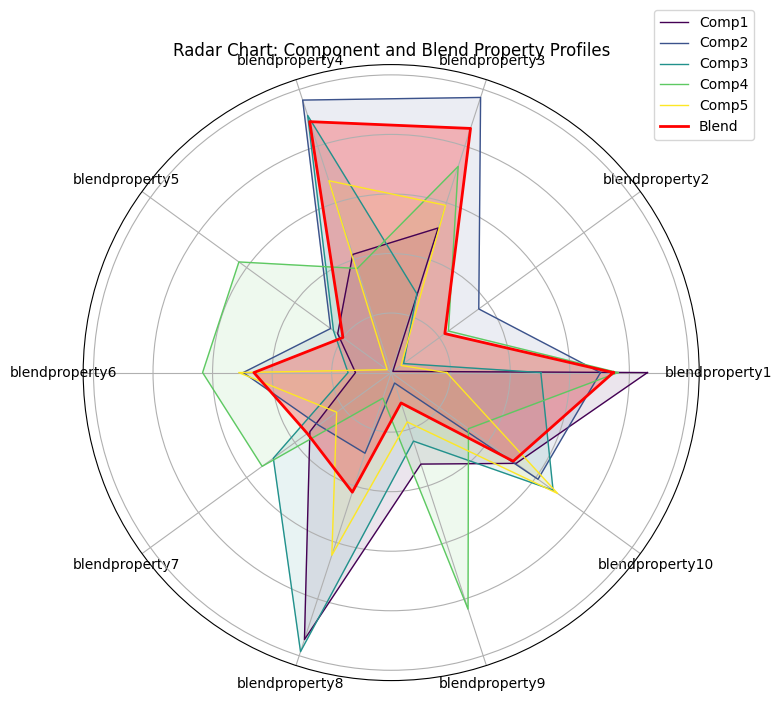

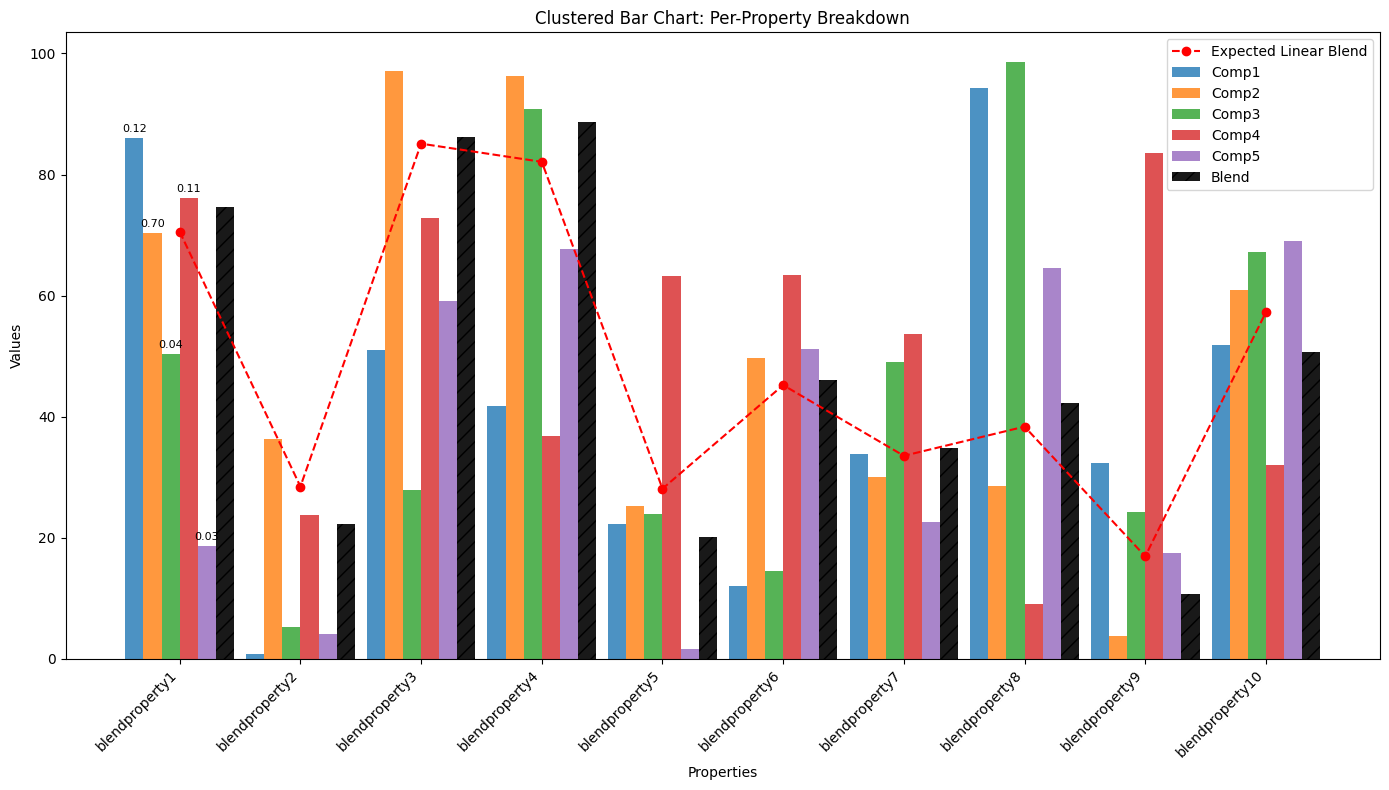

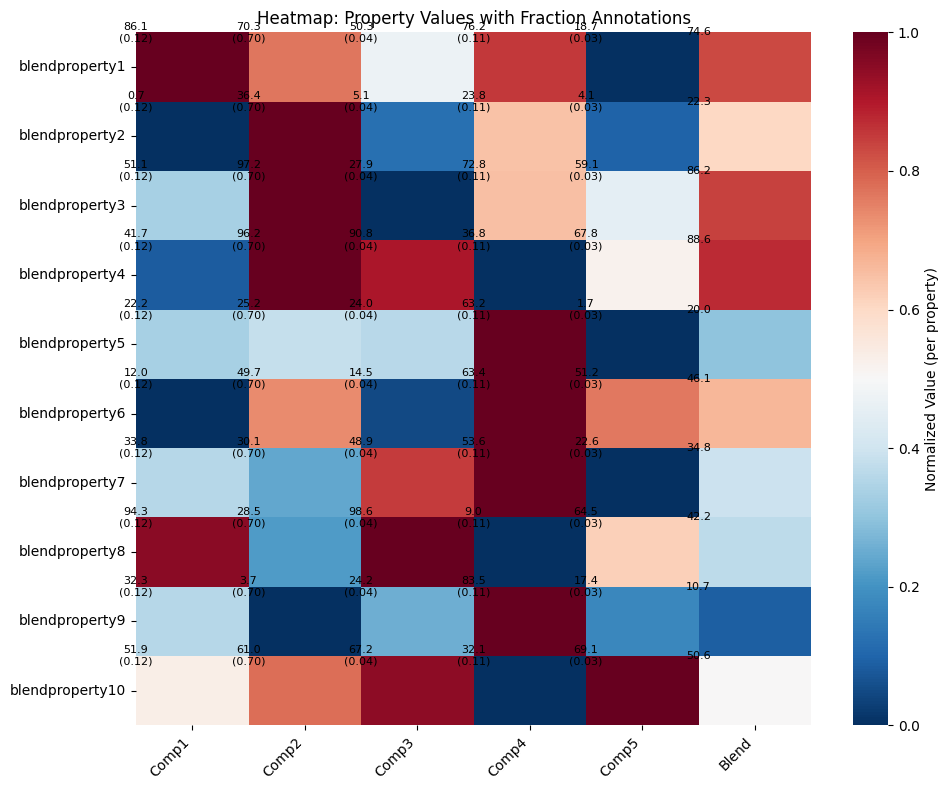

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is available; if not, adapt heatmap to matplotlib.imshow

# Generate sample dataset to represent the scenario
# 5 components, each with 10 properties (random values between 0 and 100 for realism)
# Fractions for components (sum to 1)
# Predicted blend properties: weighted average of components plus some noise to simulate model prediction

num_components = 5
num_properties = 10

components = [f'Comp{i+1}' for i in range(num_components)]
properties = [f'blendproperty{j+1}' for j in range(num_properties)]  # Matching user's naming

# Component properties: 5 x 10 matrix of values
comp_props = np.random.uniform(0, 100, size=(num_components, num_properties))

# Fractions: Dirichlet distribution for positive values summing to 1
fractions = np.random.dirichlet(np.ones(num_components))

# Predicted blend properties: dot product (weighted avg) + noise for non-linearity
blend_props = np.dot(fractions, comp_props) + np.random.normal(0, 5, num_properties)

# DataFrames for easier handling
comp_df = pd.DataFrame(comp_props, index=components, columns=properties)
blend_series = pd.Series(blend_props, index=properties, name='Blend')
fractions_series = pd.Series(fractions, index=components, name='Fractions')

print("Sample Data:")
print("Component Properties:\n", comp_df)
print("\nFractions:\n", fractions_series)
print("\nBlend Properties:\n", blend_series)

# Idea 1: Radar (Spider) Chart
# Prepare angles for radar
angles = np.linspace(0, 2 * np.pi, num_properties, endpoint=False).tolist()
angles += angles[:1]  # Close the polygon

fig1, ax1 = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each component
colors = plt.cm.viridis(np.linspace(0, 1, num_components))
for i, comp in enumerate(components):
    values = comp_df.loc[comp].values.flatten().tolist()
    values += values[:1]  # Close the polygon
    ax1.plot(angles, values, linewidth=1, linestyle='solid', label=comp, color=colors[i])
    ax1.fill(angles, values, color=colors[i], alpha=0.1)

# Plot blend
blend_values = blend_series.values.flatten().tolist()
blend_values += blend_values[:1]
ax1.plot(angles, blend_values, linewidth=2, linestyle='solid', label='Blend', color='red')
ax1.fill(angles, blend_values, color='red', alpha=0.25)

# Axes and labels
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(properties, fontsize=10)
ax1.set_yticklabels([])  # Hide radial ticks for cleanliness
ax1.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Radar Chart: Component and Blend Property Profiles')
plt.show()

# Idea 2: Clustered Bar Chart
# Prepare data for clustered bars
bar_width = 0.15
x = np.arange(num_properties)  # Property indices

fig2, ax2 = plt.subplots(figsize=(14, 8))

# Plot bars for each component
for i, comp in enumerate(components):
    ax2.bar(x + i * bar_width, comp_df.loc[comp], width=bar_width, label=comp, alpha=0.8)

# Plot blend bars (offset to the end)
ax2.bar(x + num_components * bar_width, blend_series, width=bar_width, label='Blend', color='black', hatch='//', alpha=0.9)

# Add expected linear blend line (weighted avg without noise)
linear_blend = np.dot(fractions, comp_props)
ax2.plot(x + num_components * bar_width / 2, linear_blend, color='red', linestyle='--', marker='o', label='Expected Linear Blend')

# Labels and legend
ax2.set_xlabel('Properties')
ax2.set_ylabel('Values')
ax2.set_title('Clustered Bar Chart: Per-Property Breakdown')
ax2.set_xticks(x + num_components * bar_width / 2)
ax2.set_xticklabels(properties, rotation=45, ha='right')
ax2.legend()

# Annotate fractions on component bars (for first property as example; extend if needed)
for i, comp in enumerate(components):
    ax2.text(x[0] + i * bar_width, comp_df.loc[comp, properties[0]] + 1, f'{fractions[i]:.2f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Idea 3: Heatmap with Annotated Fractions
fig3, ax3 = plt.subplots(figsize=(10, 8))

# For heatmap: transpose to have properties as rows, entities as columns
heatmap_df = comp_df.T
heatmap_df['Blend'] = blend_series

# Normalize per row (property) for coloring
normalized_df = heatmap_df.apply(lambda row: (row - row.min()) / (row.max() - row.min()), axis=1)

# Heatmap using seaborn
sns.heatmap(normalized_df, annot=False, cmap='RdBu_r', ax=ax3, cbar_kws={'label': 'Normalized Value (per property)'}, vmin=0, vmax=1)

# Annotate with original values and fractions
columns = heatmap_df.columns
for j, col in enumerate(columns):
    for i in range(len(heatmap_df)):
        value = heatmap_df.iloc[i, j]
        if col != 'Blend':
            frac = fractions[j]  # j corresponds to component index
            text = f'{value:.1f}\n({frac:.2f})'
        else:
            text = f'{value:.1f}'
        ax3.text(j, i, text, ha='center', va='center', fontsize=8, color='black')

# Labels
ax3.set_xticklabels(columns, rotation=45, ha='right')
ax3.set_yticklabels(heatmap_df.index, rotation=0)
ax3.set_title('Heatmap: Property Values with Fraction Annotations')
plt.tight_layout()
plt.show()

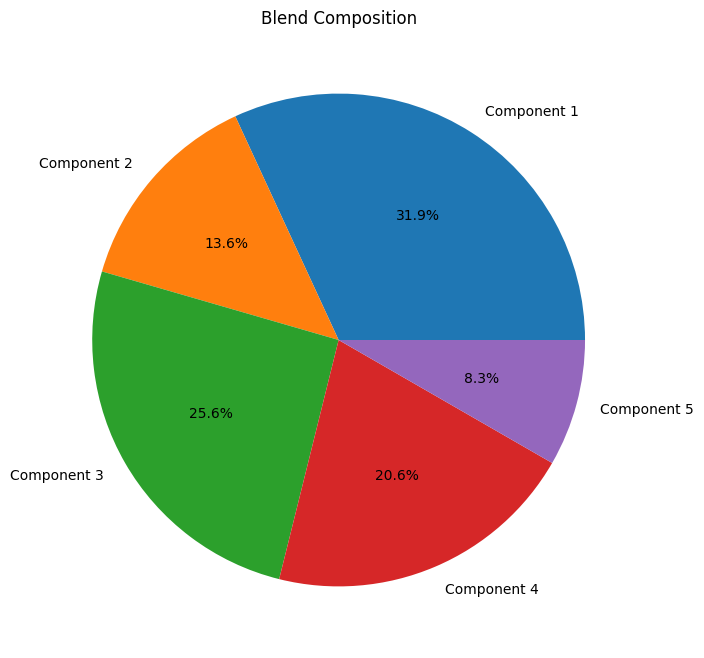

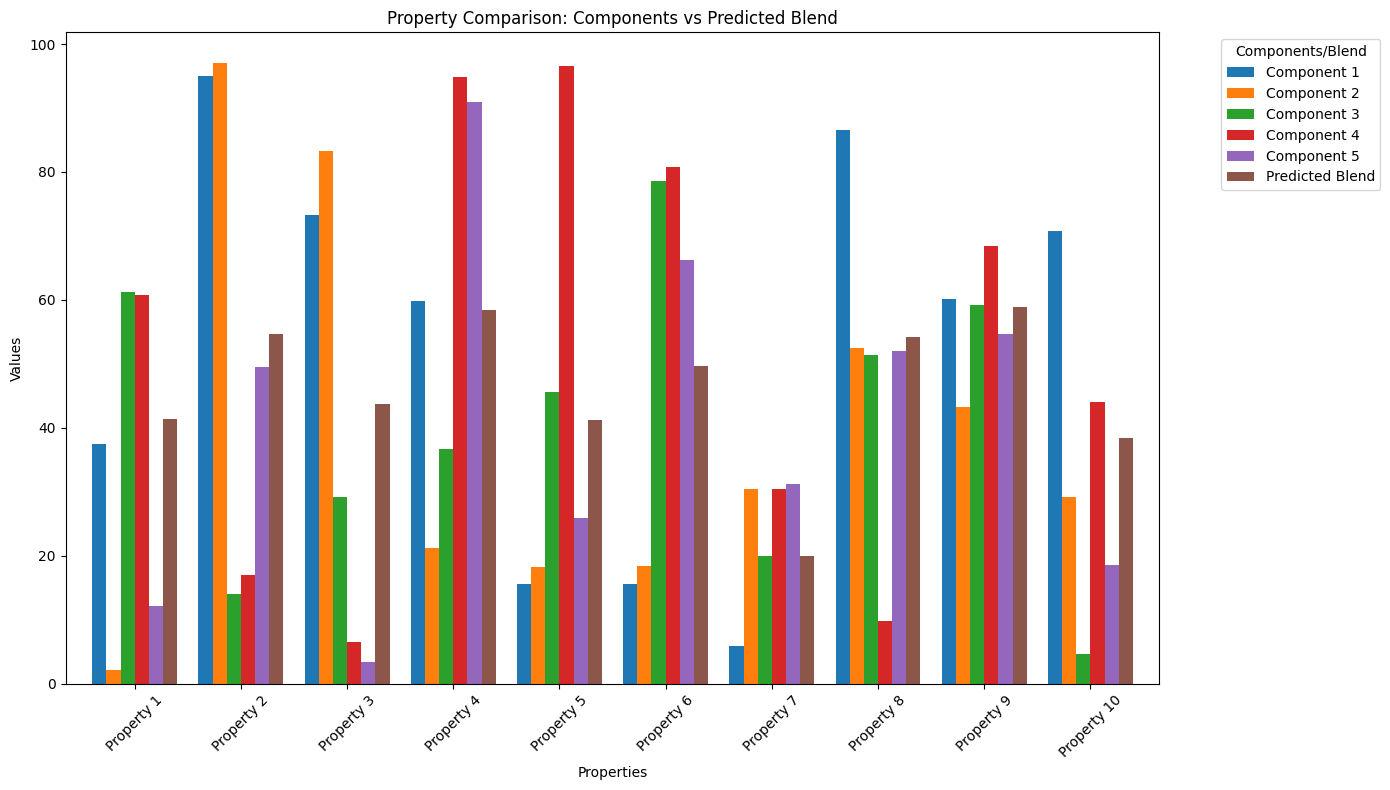

AttributeError: 'Axes' object has no attribute 'set_rgrids'

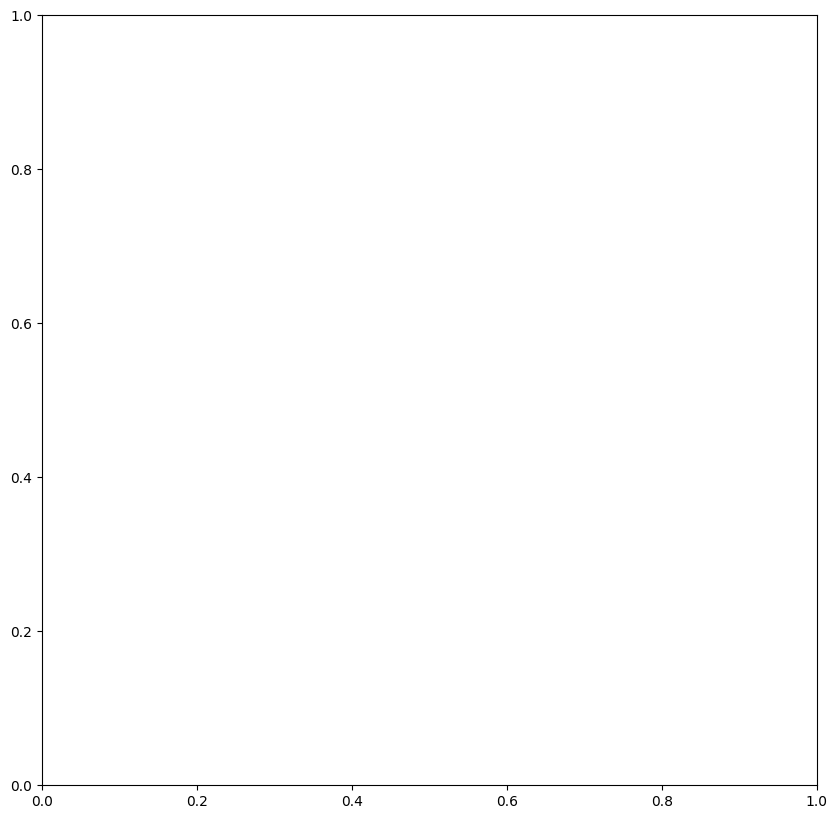

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# Generate synthetic dataset
np.random.seed(42)
num_components = 5
num_properties = 10

# Component properties: 5 components x 10 properties, values between 0 and 100
component_properties = np.random.uniform(0, 100, (num_components, num_properties))

# Fractions: Dirichlet distribution to sum to 1
fractions = np.random.dirichlet(np.ones(num_components))

# Predicted blend properties: for demo, use weighted average (linear blend)
blend_properties = np.dot(fractions, component_properties)

# Create DataFrame for easier handling
component_labels = [f'Component {i+1}' for i in range(num_components)]
property_labels = [f'Property {i+1}' for i in range(num_properties)]
df = pd.DataFrame(component_properties, index=component_labels, columns=property_labels)
df.loc['Predicted Blend'] = blend_properties

# Add fractions to component rows for annotations (blend has no fraction)
fractions_dict = dict(zip(component_labels, fractions))

# Visualization 1: Pie Chart for Blend Composition
plt.figure(figsize=(8, 8))
plt.pie(fractions, labels=component_labels, autopct='%1.1f%%', colors=plt.cm.tab10.colors[:num_components])
plt.title('Blend Composition')
plt.show()

# Visualization 2: Grouped Bar Chart for Property Comparison Across Components and Blend
plt.figure(figsize=(14, 8))
df.T.plot(kind='bar', ax=plt.gca(), color=plt.cm.tab10.colors[:num_components + 1], width=0.8)
plt.title('Property Comparison: Components vs Predicted Blend')
plt.xlabel('Properties')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Components/Blend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 3: Radar (Spider) Chart for Blend Property Profile with Component Overlays
# First, normalize properties to 0-1 for radar
df_norm = (df - df.min()) / (df.max() - df.min())

# Function to create radar chart (custom implementation)
def radar_factory(num_vars, frame='circle'):
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    class RadarAxes(PolarAxes):
        name = 'radar'
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')
        def fill(self, *args, closed=True, **kwargs):
            return super().fill(*args, closed=closed, **kwargs)
        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)
        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)
        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)
        def _gen_axes_patch(self):
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars, radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)
        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                spine = Spine(axes=self, spine_type='circle', path=Path.unit_regular_polygon(num_vars))
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5) + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)
    register_projection(RadarAxes)
    return theta

theta = radar_factory(num_properties, 'polygon')
fig, ax = plt.subplots(figsize=(10, 10))#, subplot_kw=dict('projection': 'radar'))
ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
ax.set_ylim(0, 1)
ax.set_title('Blend Property Profile with Component Overlays')

# Plot blend
ax.plot(theta, df_norm.loc['Predicted Blend'], color='black', linewidth=2, label='Predicted Blend')
ax.fill(theta, df_norm.loc['Predicted Blend'], color='black', alpha=0.25)

# Plot components with semi-transparent overlays
for i, comp in enumerate(component_labels):
    ax.plot(theta, df_norm.loc[comp], color=plt.cm.tab10.colors[i], linewidth=1, linestyle='--', label=f'{comp} ({fractions[i]:.1%})')
    ax.fill(theta, df_norm.loc[comp], color=plt.cm.tab10.colors[i], alpha=0.1)

ax.set_varlabels(property_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualization 4: Heatmap for Comprehensive Property Matrix
# Create annotation matrix with fractions appended for components
annot = df.copy().astype(str)
for comp in component_labels:
    frac = fractions_dict[comp]
    annot.loc[comp] = df.loc[comp].astype(str) + f' ({frac:.1%})'
annot.loc['Predicted Blend'] = df.loc['Predicted Blend'].astype(str)

plt.figure(figsize=(14, 8))
sns.heatmap(df, annot=annot, fmt='', cmap='coolwarm', cbar_kws={'label': 'Property Values'})
plt.title('Comprehensive Property Matrix: Components and Predicted Blend')
plt.tight_layout()
plt.show()

In [66]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from itertools import combinations

# ----------------------------------------------------------------------
# SYNTHETIC DATA (5 blends, 5 components per blend, 10 properties)
# ----------------------------------------------------------------------
np.random.seed(42)

n_blends = 5
n_components = 5
n_properties = 10

# Blend-level data
blends = pd.DataFrame({
    "Blend": [f"Blend {i+1}" for i in range(n_blends)],
    "Quality": np.round(np.random.uniform(70, 95, n_blends), 2),
    "Cost": np.round(np.random.uniform(200, 400, n_blends), 2)
})

# Properties per blend
for j in range(n_properties):
    blends[f"Prop{j+1}"] = np.round(np.random.uniform(0.5, 1.5, n_blends), 2)

# Component-level data
components = []
for b in blends["Blend"]:
    fractions = np.random.dirichlet(np.ones(n_components), 1)[0]  # fractions sum to 1
    for i in range(n_components):
        comp_props = np.round(np.random.uniform(0.5, 1.5, n_properties), 2)
        components.append({
            "Blend": b,
            "Component": f"C{i+1}",
            "Fraction": fractions[i],
            **{f"Prop{j+1}": comp_props[j] for j in range(n_properties)}
        })

components = pd.DataFrame(components)

# ----------------------------------------------------------------------
# 1. COST VS QUALITY SCATTER + PARETO FRONT
# ----------------------------------------------------------------------
fig1 = px.scatter(
    blends, x="Cost", y="Quality",
    text="Blend", color="Blend", size="Quality",
    title="Cost vs Quality with Pareto Frontier"
)

# Compute Pareto frontier (min cost, max quality)
points = blends[["Cost", "Quality"]].values
pareto = []
for i, p in enumerate(points):
    if not np.any((points[:,0] <= p[0]) & (points[:,1] >= p[1]) & (points != p).all(axis=1)):
        pareto.append(tuple(p))
pareto = sorted(pareto, key=lambda x: x[0])
fig1.add_trace(go.Scatter(
    x=[p[0] for p in pareto], y=[p[1] for p in pareto],
    mode="lines+markers", line=dict(dash="dot", color="black"),
    name="Pareto frontier"
))

fig1.show()

# ----------------------------------------------------------------------
# 2. WEIGHTED CONTRIBUTION WATERFALL (example: Blend 1, Property 1)
# ----------------------------------------------------------------------
blend_choice = "Blend 1"
prop_choice = "Prop1"

df = components[components["Blend"] == blend_choice].copy()
df["Contribution"] = df["Fraction"] * df[prop_choice]
df = df.sort_values("Contribution", ascending=False)

fig2 = go.Figure(go.Waterfall(
    name="Contrib",
    orientation="v",
    measure=["relative"] * len(df) + ["total"],
    x=list(df["Component"]) + ["Total"],
    text=np.round(list(df["Contribution"]) + [df["Contribution"].sum()], 2),
    y=list(df["Contribution"]) + [df["Contribution"].sum()],
    connector={"line": {"color":"rgb(63, 63, 63)"}}
))
fig2.update_layout(title=f"Weighted Contribution to {prop_choice} - {blend_choice}")
fig2.show()

# ----------------------------------------------------------------------
# 3. 100% STACKED BAR (component fractions per blend)
# ----------------------------------------------------------------------
fractions = components.pivot(index="Blend", columns="Component", values="Fraction").fillna(0)

fig3 = go.Figure()
for c in fractions.columns:
    fig3.add_bar(x=fractions.index, y=fractions[c], name=c)

fig3.update_layout(
    barmode="stack", title="Component Fractions per Blend (100% stacked)",
    yaxis=dict(title="Fraction", tickformat=".0%", range=[0,1])
)
fig3.show()

# ----------------------------------------------------------------------
# 4. PARALLEL COORDINATES (blend properties, colored by Quality)
# ----------------------------------------------------------------------
dims = [dict(label=col, values=blends[col]) for col in [f"Prop{i+1}" for i in range(n_properties)]]

fig4 = go.Figure(data=go.Parcoords(
    line=dict(color=blends["Quality"], colorscale="Viridis", showscale=True),
    dimensions=dims
))
fig4.update_layout(title="Parallel Coordinates of Blend Properties (color=Quality)")
fig4.show()


Synthetic blend dataset:
          Property 1  Property 2  Property 3  Property 4  Property 5  \
Blend 1       37.45       95.07       73.20       59.87       15.60   
Blend 2        2.06       96.99       83.24       21.23       18.18   
Blend 3       61.19       13.95       29.21       36.64       45.61   
Blend 4       60.75       17.05        6.51       94.89       96.56   
Blend 5       12.20       49.52        3.44       90.93       25.88   

         Property 6  Property 7  Property 8  Property 9  Property 10  Quality  \
Blend 1       15.60        5.81       86.62       60.11        70.81     9.70   
Blend 2       18.34       30.42       52.48       43.19        29.12     7.75   
Blend 3       78.52       19.97       51.42       59.24         4.65     9.39   
Blend 4       80.84       30.46        9.77       68.42        44.02     8.95   
Blend 5       66.25       31.17       52.01       54.67        18.49     5.98   

           Cost  
Blend 1  921.87  
Blend 2   88.49  
Blend 

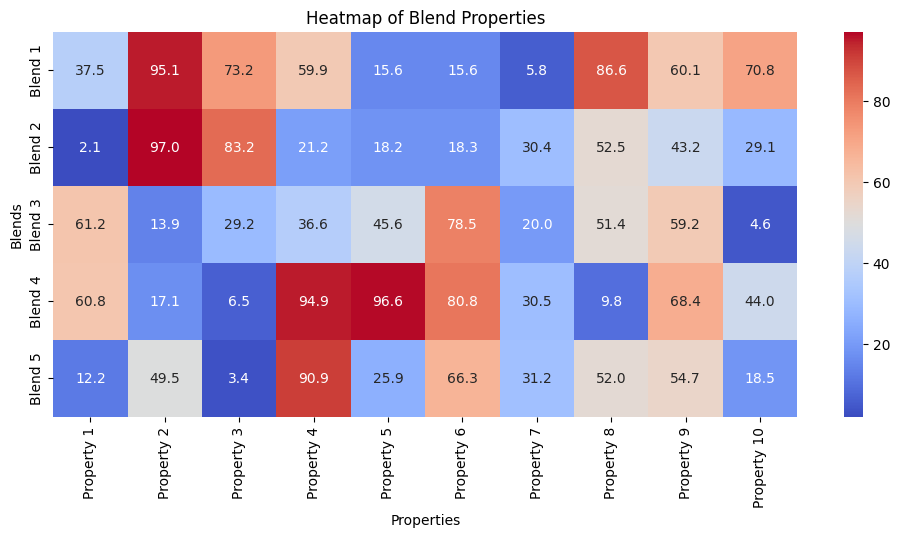

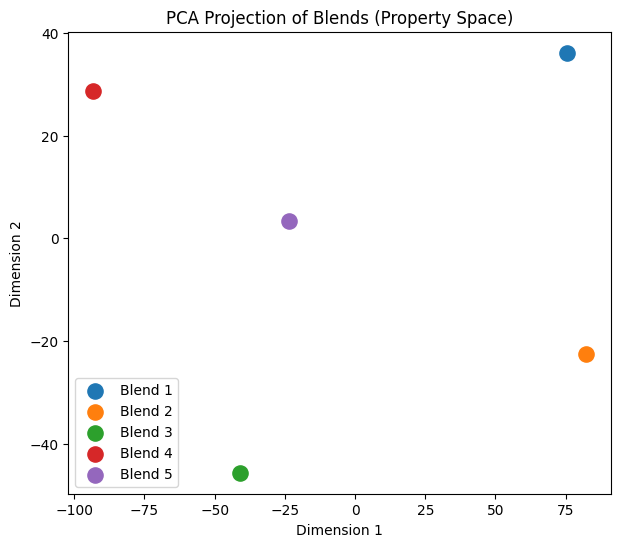

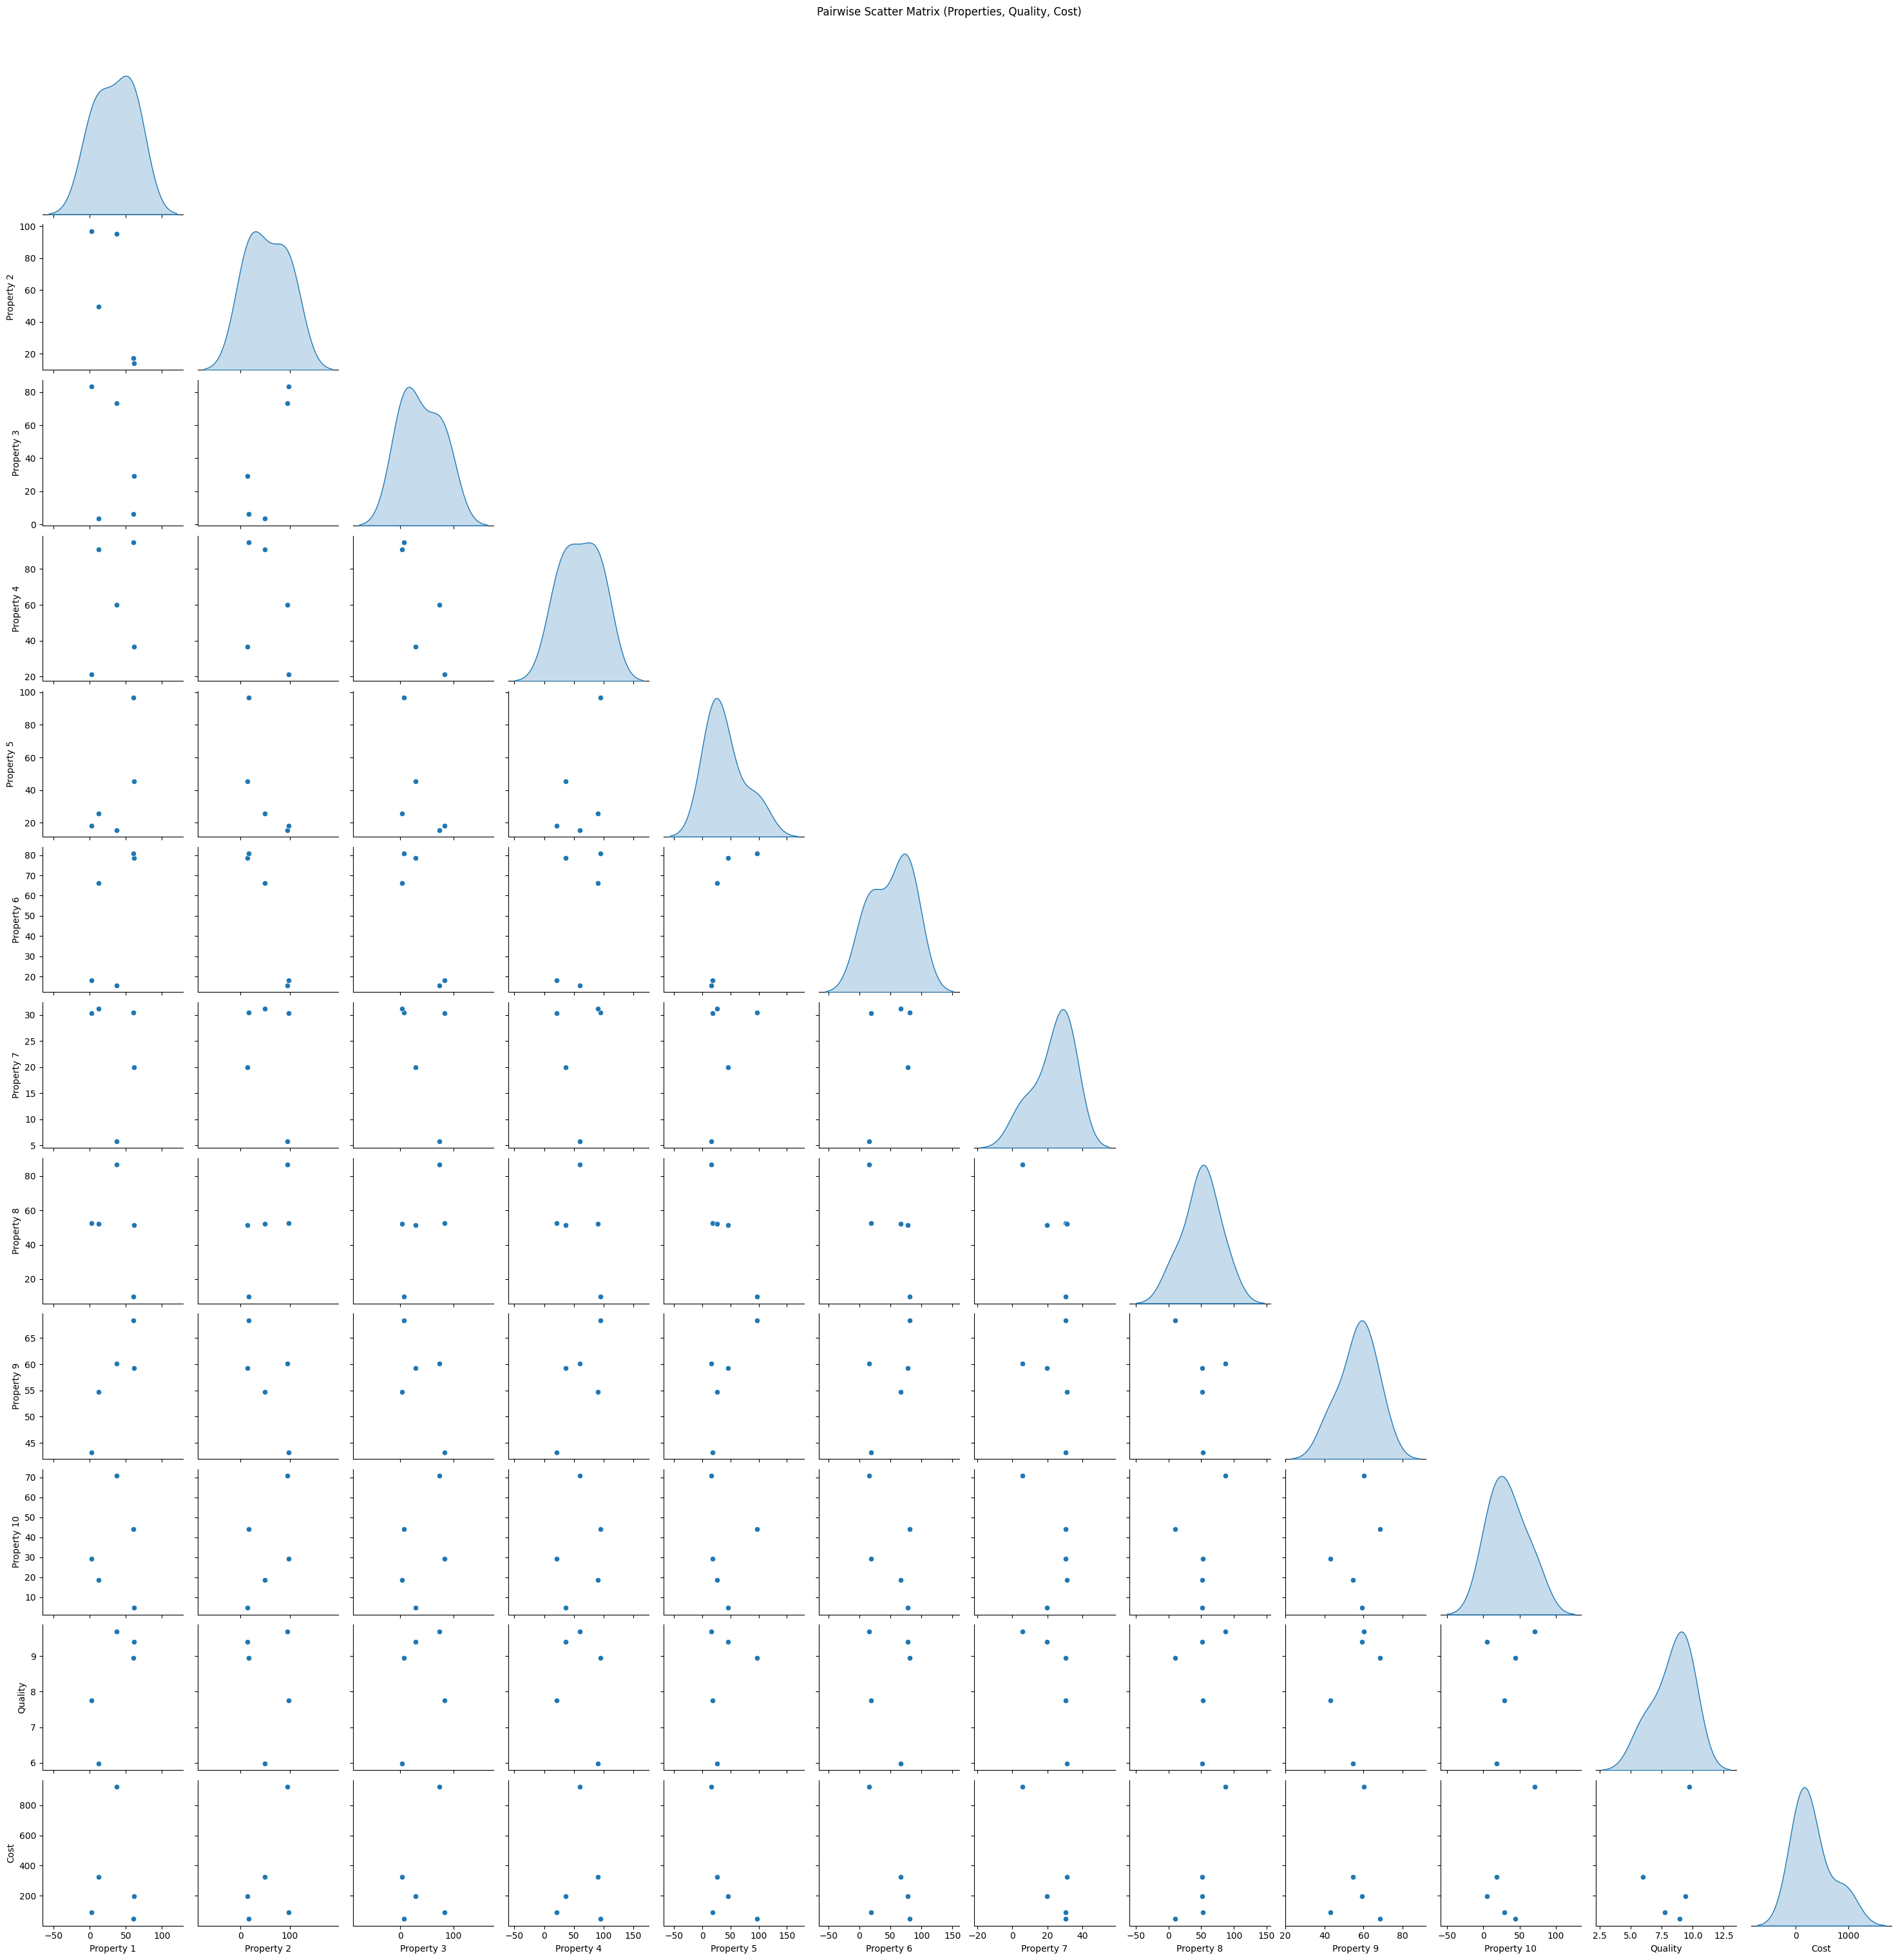

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import umap

# -------------------------------
# 1. Create synthetic data (5 blends × 10 properties + quality + cost)
# -------------------------------
np.random.seed(42)
blend_names = [f"Blend {i+1}" for i in range(5)]
property_names = [f"Property {j+1}" for j in range(10)]

# Random property values between 0 and 100
data = np.random.rand(5, 10) * 100
quality = np.random.rand(5) * 10  # 0–10 quality score
cost = np.random.rand(5) * 1000   # 0–1000 cost

df = pd.DataFrame(data, columns=property_names, index=blend_names)
df["Quality"] = quality
df["Cost"] = cost

print("Synthetic blend dataset:\n", df.round(2))

# ============================================================
# IDEA 5: Heatmap (blends × properties, normalized)
# ============================================================
plt.figure(figsize=(12, 5))
sns.heatmap(df[property_names], annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Heatmap of Blend Properties")
plt.ylabel("Blends")
plt.xlabel("Properties")
plt.show()

# ============================================================
# IDEA 6: PCA / UMAP scatter of property space
# ============================================================
X = df[property_names].values
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(X)

# Try UMAP (fallback if not installed)
try:
    reducer = umap.UMAP(n_neighbors=3, min_dist=0.3, random_state=42)
    umap_coords = reducer.fit_transform(X)
    coords = umap_coords
    method = "UMAP"
except Exception:
    coords = pca_coords
    method = "PCA"

plt.figure(figsize=(7, 6))
for i, name in enumerate(blend_names):
    plt.scatter(coords[i, 0], coords[i, 1], s=120, label=name)
plt.title(f"{method} Projection of Blends (Property Space)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

# ============================================================
# IDEA 8: Radar (Spider) charts – one per blend (small multiples)
# ============================================================
def radar_chart_for_blend(blend_name):
    categories = property_names
    values = df.loc[blend_name, property_names].values
    values = np.concatenate((values, [values[0]]))  # close the loop
    categories = categories + [categories[0]]

    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(r=values, theta=categories, fill='toself', name=blend_name))
    fig.update_layout(polar=dict(radialaxis=dict(visible=True)), showlegend=True,
                      title=f"Radar Chart – {blend_name}")
    fig.show()

# Show radar chart for all blends
for blend in blend_names:
    radar_chart_for_blend(blend)

# ============================================================
# IDEA 9: Pairwise scatter matrix (properties vs quality & cost)
# ============================================================
sns.pairplot(df[property_names + ["Quality", "Cost"]], corner=True, diag_kind="kde")
plt.suptitle("Pairwise Scatter Matrix (Properties, Quality, Cost)", y=1.02)
plt.show()


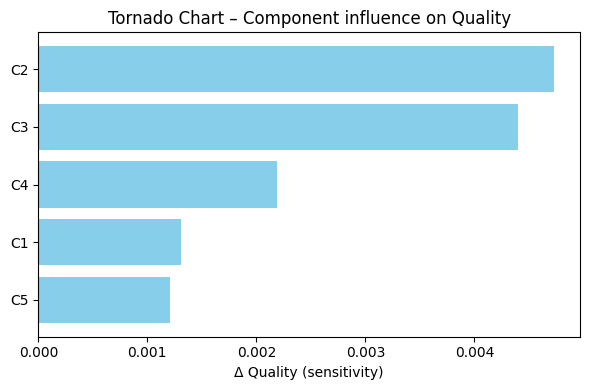

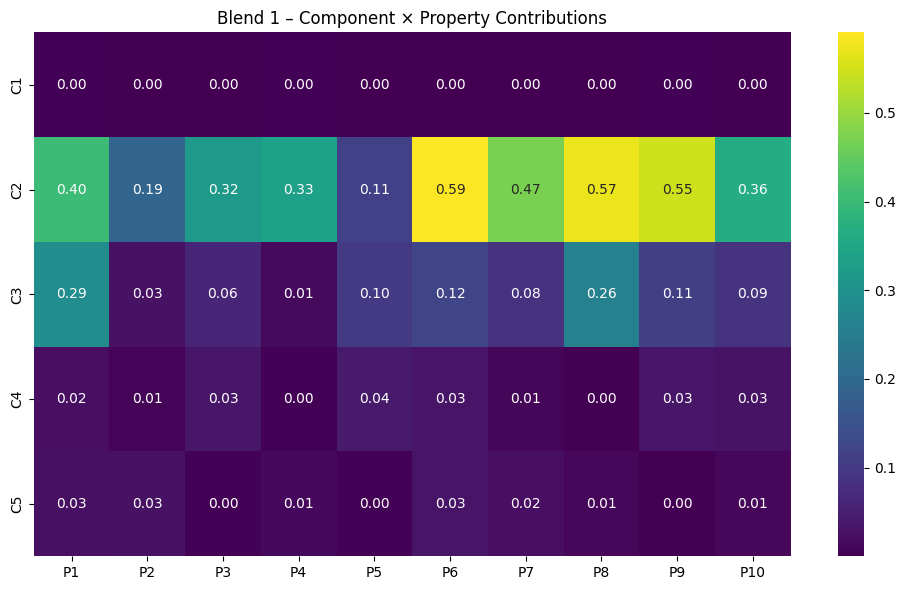

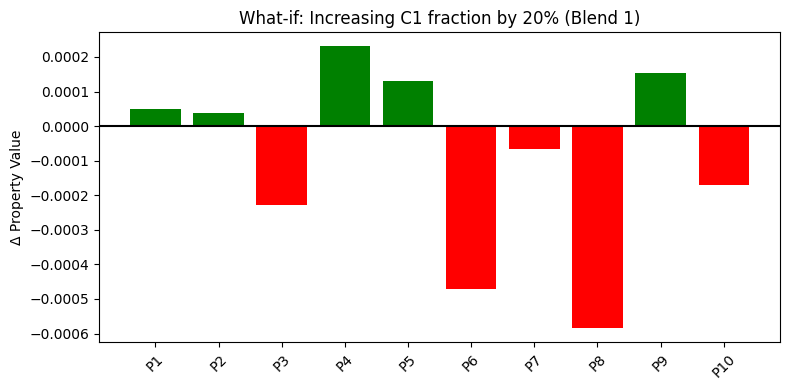

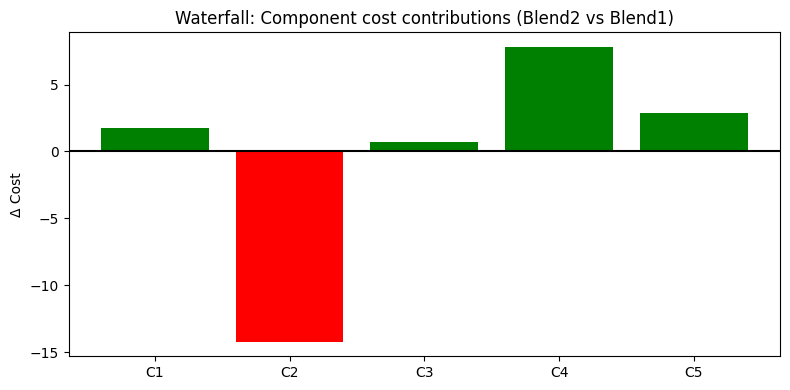

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# -------------------------------------------------------------------
# SYNTHETIC DATA GENERATION
# -------------------------------------------------------------------
np.random.seed(42)

n_blends = 5
n_components = 5
n_properties = 10

# Blend-level info
blend_names = [f"Blend {i+1}" for i in range(n_blends)]
qualities = np.random.uniform(70, 95, n_blends)
costs = np.random.uniform(100, 200, n_blends)

# Component fractions for each blend (rows = blends, cols = components)
comp_fracs = np.random.dirichlet(np.ones(n_components), size=n_blends)

# Component property values (10 properties each)
comp_props = np.random.uniform(0, 1, (n_components, n_properties))

# Blend property values (weighted avg of component properties)
blend_props = comp_fracs @ comp_props

# Build tidy dataframe
blend_df = pd.DataFrame(blend_props, columns=[f"Prop{i+1}" for i in range(n_properties)])
blend_df["Blend"] = blend_names
blend_df["Quality"] = qualities
blend_df["Cost"] = costs

# -------------------------------------------------------------------
# IDEA 10: Tornado chart (sensitivity of components on quality/cost)
# -------------------------------------------------------------------
# Perturb each component fraction by +10% and recompute quality (approx: weighted avg)
sensitivity = []
for c in range(n_components):
    for sign in [+1, -1]:
        perturbed = comp_fracs.copy()
        perturbed[:, c] = np.clip(perturbed[:, c] * (1 + 0.1*sign), 0, 1)
        perturbed = perturbed / perturbed.sum(axis=1, keepdims=True)
        pert_quality = (perturbed @ comp_props).mean(axis=1).mean()  # proxy
        sensitivity.append({"Component": f"C{c+1}", "Direction": "+" if sign>0 else "-", "Quality": pert_quality})

sens_df = pd.DataFrame(sensitivity)
sens_avg = sens_df.groupby("Component")["Quality"].apply(lambda x: x.max()-x.min()).reset_index()
sens_avg = sens_avg.sort_values("Quality", ascending=True)

plt.figure(figsize=(6,4))
plt.barh(sens_avg["Component"], sens_avg["Quality"], color="skyblue")
plt.title("Tornado Chart – Component influence on Quality")
plt.xlabel("Δ Quality (sensitivity)")
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# IDEA 11: Component × Property grid (heatmap per blend)
# -------------------------------------------------------------------
# Example: Blend 1 component properties (fraction * prop value)
blend1_contrib = comp_fracs[0][:,None] * comp_props
plt.figure(figsize=(10,6))
sns.heatmap(blend1_contrib, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=[f"P{i+1}" for i in range(n_properties)],
            yticklabels=[f"C{i+1}" for i in range(n_components)])
plt.title("Blend 1 – Component × Property Contributions")
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# IDEA 12: What-if simulator (adjust component fractions, recompute)
# -------------------------------------------------------------------
# Example: Increase C1 fraction in Blend 1 by 20%
new_fracs = comp_fracs[0].copy()
new_fracs[0] *= 1.2
new_fracs /= new_fracs.sum()
old_props = comp_fracs[0] @ comp_props
new_props = new_fracs @ comp_props

delta = new_props - old_props
plt.figure(figsize=(8,4))
plt.bar(range(n_properties), delta, color=["g" if d>0 else "r" for d in delta])
plt.axhline(0, color="black")
plt.xticks(range(n_properties), [f"P{i+1}" for i in range(n_properties)], rotation=45)
plt.title("What-if: Increasing C1 fraction by 20% (Blend 1)")
plt.ylabel("Δ Property Value")
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# IDEA 13: Property vs Cost waterfall (explain cost difference)
# -------------------------------------------------------------------
# Compare Blend1 vs Blend2 component costs
comp_costs = np.random.uniform(10, 40, n_components)
blend_cost1 = (comp_fracs[0] * comp_costs).sum()
blend_cost2 = (comp_fracs[1] * comp_costs).sum()
diffs = (comp_fracs[1]-comp_fracs[0]) * comp_costs

plt.figure(figsize=(8,4))
running = [blend_cost1]
for d in diffs:
    running.append(running[-1]+d)
bars = diffs.tolist()+[blend_cost2-running[-1]]
plt.bar(range(len(diffs)), diffs, color=["g" if d>0 else "r" for d in diffs])
plt.axhline(0, color="black")
plt.title("Waterfall: Component cost contributions (Blend2 vs Blend1)")
plt.ylabel("Δ Cost")
plt.xticks(range(n_components), [f"C{i+1}" for i in range(n_components)])
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# IDEA 14: Correlation chord diagram (properties ↔ quality/cost)
# -------------------------------------------------------------------
# Compute correlations
corrs = blend_df.drop("Blend", axis=1).corr()
targets = ["Quality","Cost"]
props = [f"Prop{i+1}" for i in range(n_properties)]

# Build chord data
labels = props + targets
matrix = np.zeros((len(labels), len(labels)))
for i, p in enumerate(props):
    for j, t in enumerate(targets):
        val = corrs.loc[p,t]
        matrix[i, len(props)+j] = abs(val)
        matrix[len(props)+j, i] = abs(val)

# Plotly Chord (simulate with Sankey)
sources, targets_, values = [], [], []
for i in range(len(labels)):
    for j in range(len(labels)):
        if matrix[i,j]>0:
            sources.append(i)
            targets_.append(j)
            values.append(matrix[i,j])

fig = go.Figure(go.Sankey(
    node=dict(label=labels, pad=20, thickness=20),
    link=dict(source=sources, target=targets_, value=values)
))
fig.update_layout(title_text="Correlation Chord (Properties ↔ Quality/Cost)", font_size=10)
fig.show()
